In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [151]:
data=pd.read_csv('D:/occupation/Data scince/Exercise/Cervical_Cancer_Predection/Cancer_Predection1.csv')
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
0,18,4,15,1,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0
3,52,5,16,4,1,1,0,0,0
4,46,3,21,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0
854,32,2,19,1,0,1,0,0,0
855,25,2,17,0,0,1,0,0,0
856,33,2,24,2,0,1,0,0,0


In [152]:
data.describe()

,Age,Biopsy
count,858.000000,858.000000
mean,26.820513,0.064103
std,8.497948,0.245078
min,13.000000,0.000000
25%,20.000000,0.000000
50%,25.000000,0.000000
75%,32.000000,0.000000
max,84.000000,1.000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        858 non-null    int64 
 1   Number of sexual partners  858 non-null    object
 2   First sexual intercourse   858 non-null    object
 3   Num of pregnancies         858 non-null    object
 4   Smokes                     858 non-null    object
 5   Hormonal Contraceptives    858 non-null    object
 6   IUD                        858 non-null    object
 7   STDs                       858 non-null    object
 8   Biopsy                     858 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 60.5+ KB


In [154]:
data2= data.replace ('?',np.nan)    # Replacing '?' with 'NAN' to show missing values.
data2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
0,18,4,15,1,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0
3,52,5,16,4,1,1,0,0,0
4,46,3,21,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0
854,32,2,19,1,0,1,0,0,0
855,25,2,17,0,0,1,0,0,0
856,33,2,24,2,0,1,0,0,0


In [155]:
data2.info()      # investigating the number of missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        858 non-null    int64 
 1   Number of sexual partners  832 non-null    object
 2   First sexual intercourse   851 non-null    object
 3   Num of pregnancies         802 non-null    object
 4   Smokes                     845 non-null    object
 5   Hormonal Contraceptives    750 non-null    object
 6   IUD                        741 non-null    object
 7   STDs                       753 non-null    object
 8   Biopsy                     858 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 60.5+ KB


In [156]:
data2=data2.apply(pd.to_numeric)       #changing the type of data from object to float
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        858 non-null    int64  
 1   Number of sexual partners  832 non-null    float64
 2   First sexual intercourse   851 non-null    float64
 3   Num of pregnancies         802 non-null    float64
 4   Smokes                     845 non-null    float64
 5   Hormonal Contraceptives    750 non-null    float64
 6   IUD                        741 non-null    float64
 7   STDs                       753 non-null    float64
 8   Biopsy                     858 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 60.5 KB


In [157]:
# Fill other MISSING VALUES of each column, with ffill

data4=data2.fillna(method = 'ffill')
data4

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0
2,34,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,1.0,1.0,0.0,0.0,0
4,46,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0
854,32,2.0,19.0,1.0,0.0,1.0,0.0,0.0,0
855,25,2.0,17.0,0.0,0.0,1.0,0.0,0.0,0
856,33,2.0,24.0,2.0,0.0,1.0,0.0,0.0,0


In [158]:
data4.isnull().sum()

Age                          0
Number of sexual partners    0
First sexual intercourse     0
Num of pregnancies           0
Smokes                       0
Hormonal Contraceptives      0
IUD                          0
STDs                         0
Biopsy                       0
dtype: int64

In [159]:
# CORRELATION MATRIX

cor=data4.corr()
cor

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Biopsy
Age,1.000000,0.087292,0.365183,0.509133,0.063046,0.064662,0.255217,0.013057,0.055956
Number of sexual partners,0.087292,1.000000,-0.143963,0.068396,0.230286,0.015135,0.032150,0.065145,-0.001513
First sexual intercourse,0.365183,-0.143963,1.000000,-0.030774,-0.114986,0.036976,-0.026700,-0.019114,0.007786
Num of pregnancies,0.509133,0.068396,-0.030774,1.000000,0.086062,0.100491,0.201732,0.064758,0.036625
Smokes,0.063046,0.230286,-0.114986,0.086062,1.000000,-0.000239,-0.029563,0.094384,0.039296
Hormonal Contraceptives,0.064662,0.015135,0.036976,0.100491,-0.000239,1.000000,0.017762,-0.025031,0.010519
IUD,0.255217,0.032150,-0.026700,0.201732,-0.029563,0.017762,1.000000,0.062593,0.045314
STDs,0.013057,0.065145,-0.019114,0.064758,0.094384,-0.025031,0.062593,1.000000,0.096758
Biopsy,0.055956,-0.001513,0.007786,0.036625,0.039296,0.010519,0.045314,0.096758,1.000000


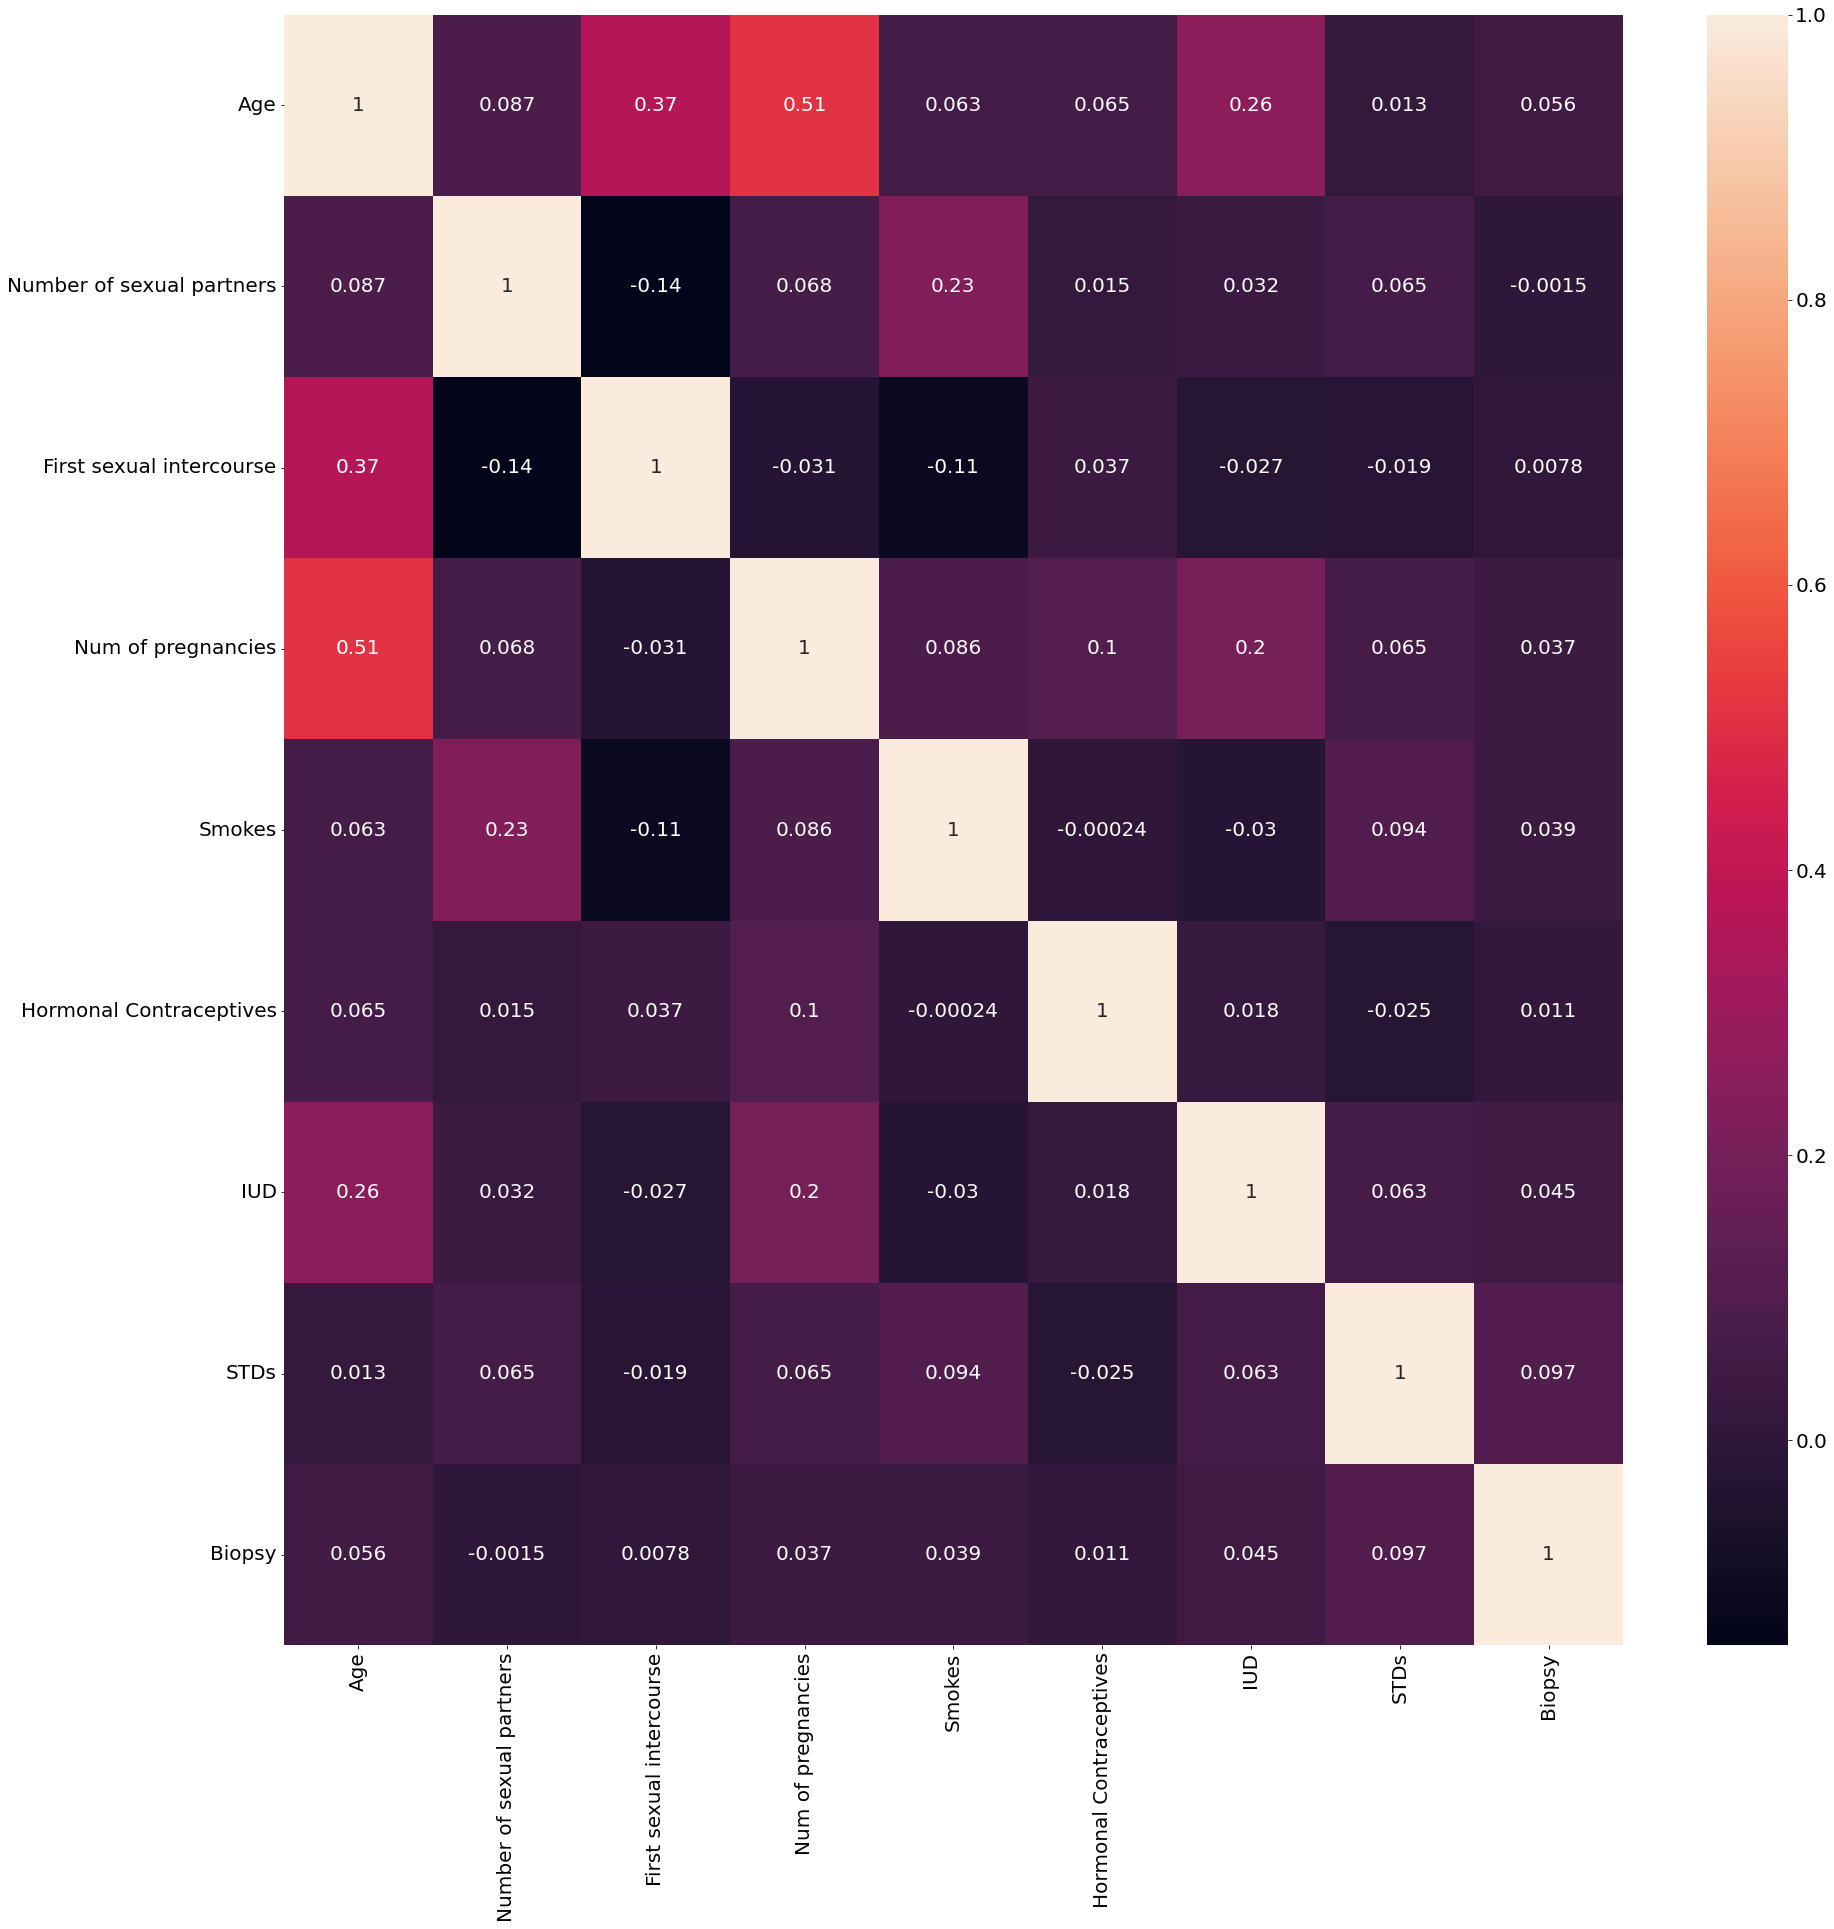

In [160]:
# CORRELATION Plot
plt.figure(figsize = (30,30))            
sns.heatmap(cor, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=20)
plt.show()

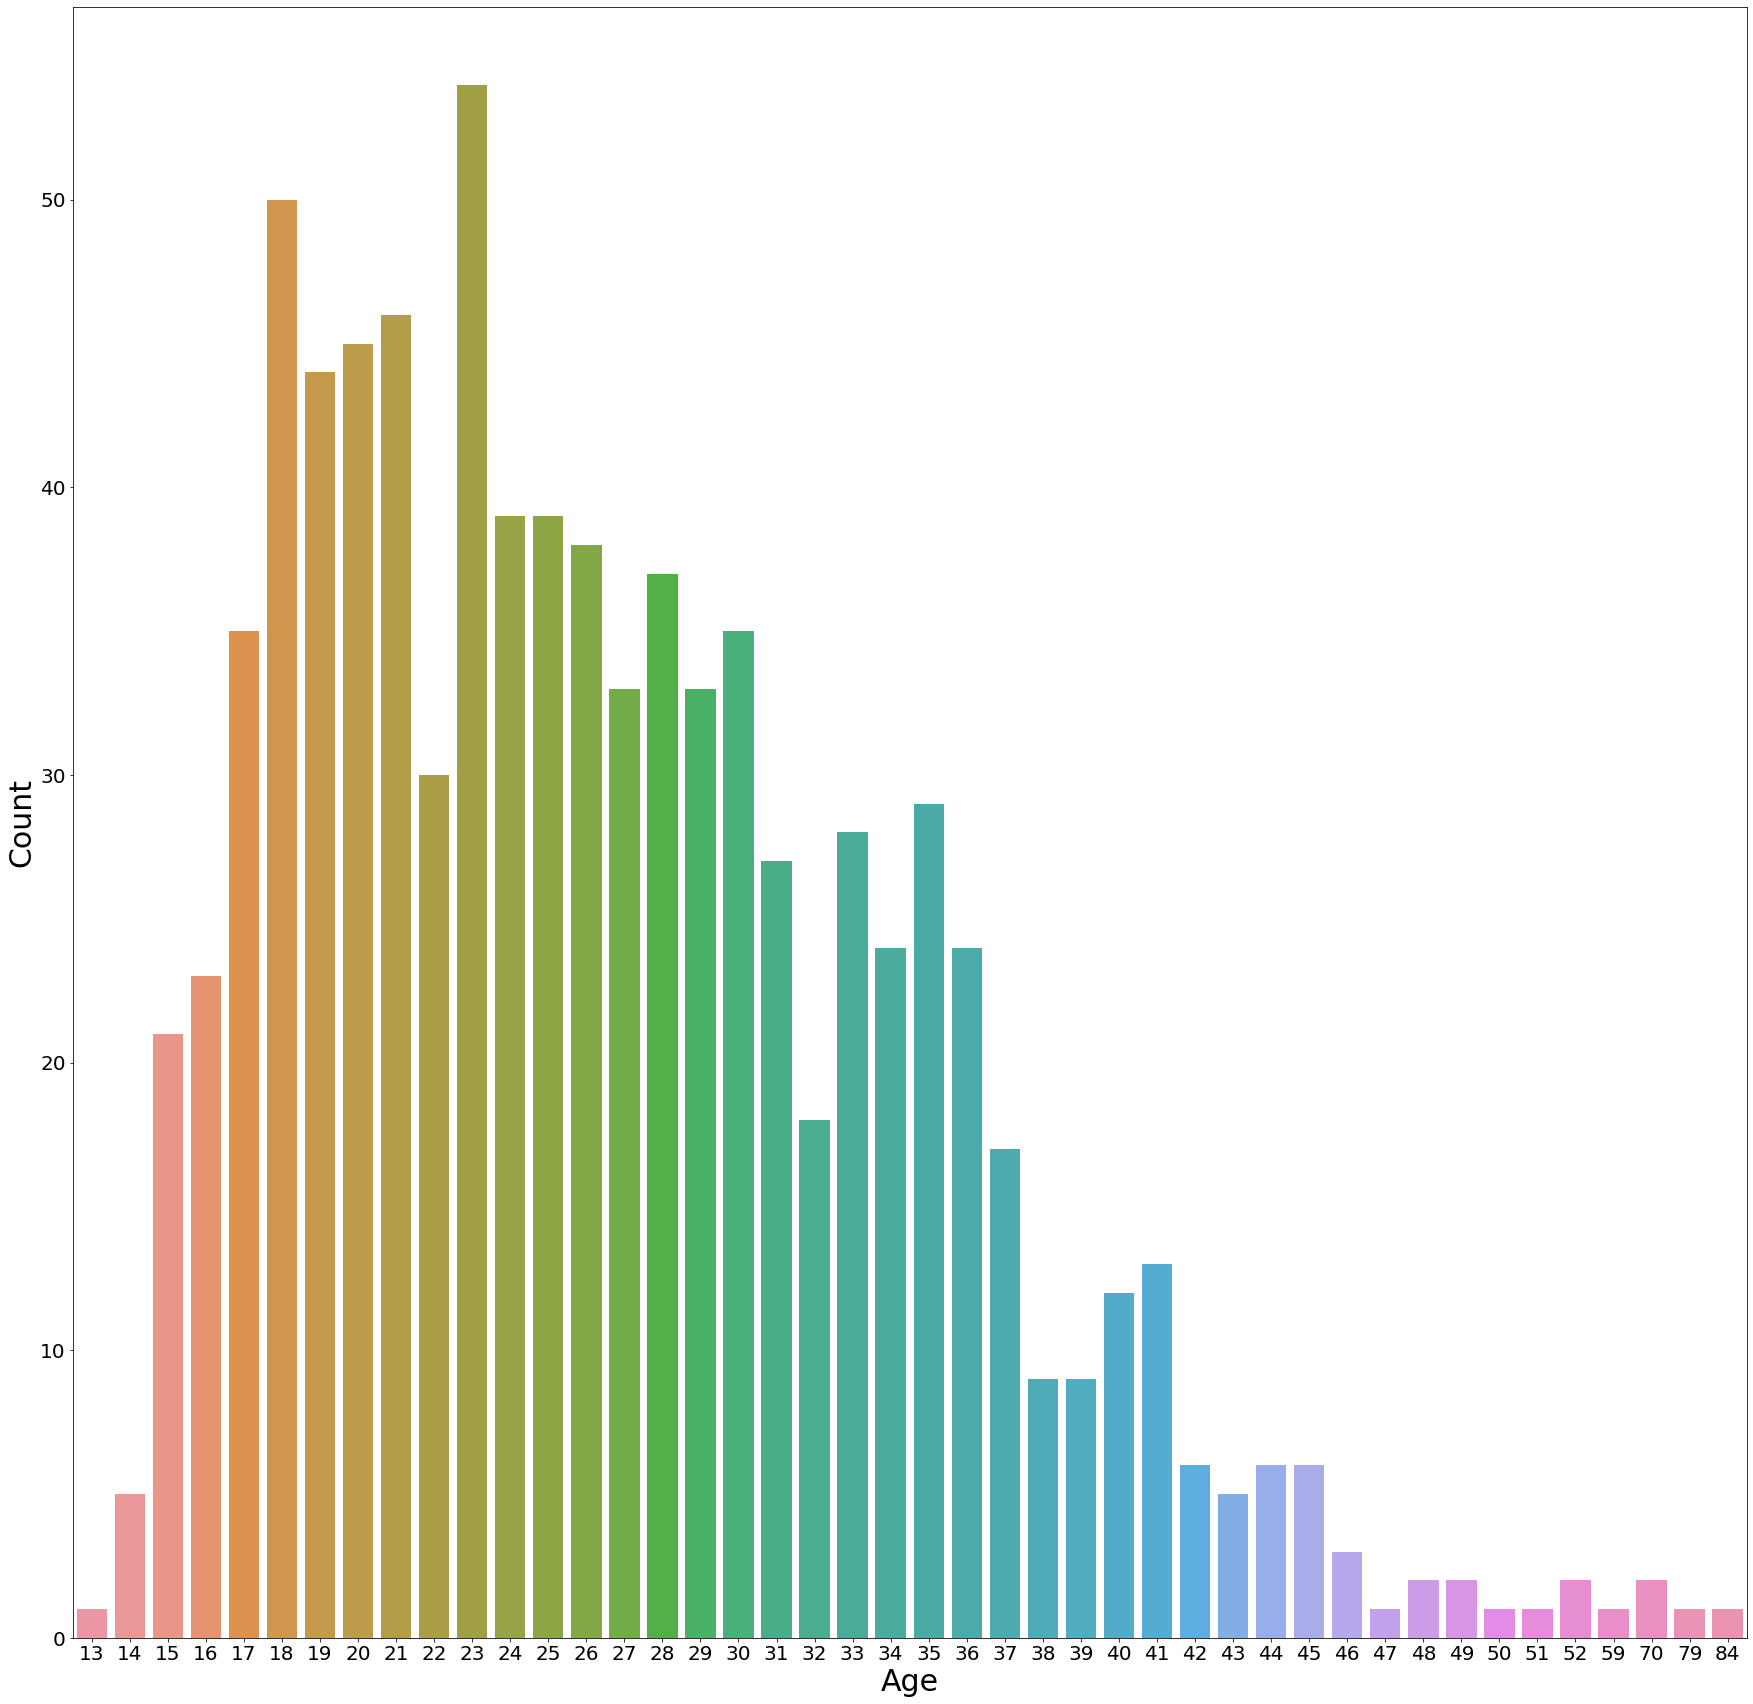

In [161]:
# countplot of 'Age' column
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Age')
plt.xlabel('Age', fontsize = 30, color = 'black')
plt.rc('xtick', labelsize=20, color = 'black')
plt.ylabel('Count', fontsize = 30, color = 'black')
plt.rc('ytick', labelsize=20, color = 'black')

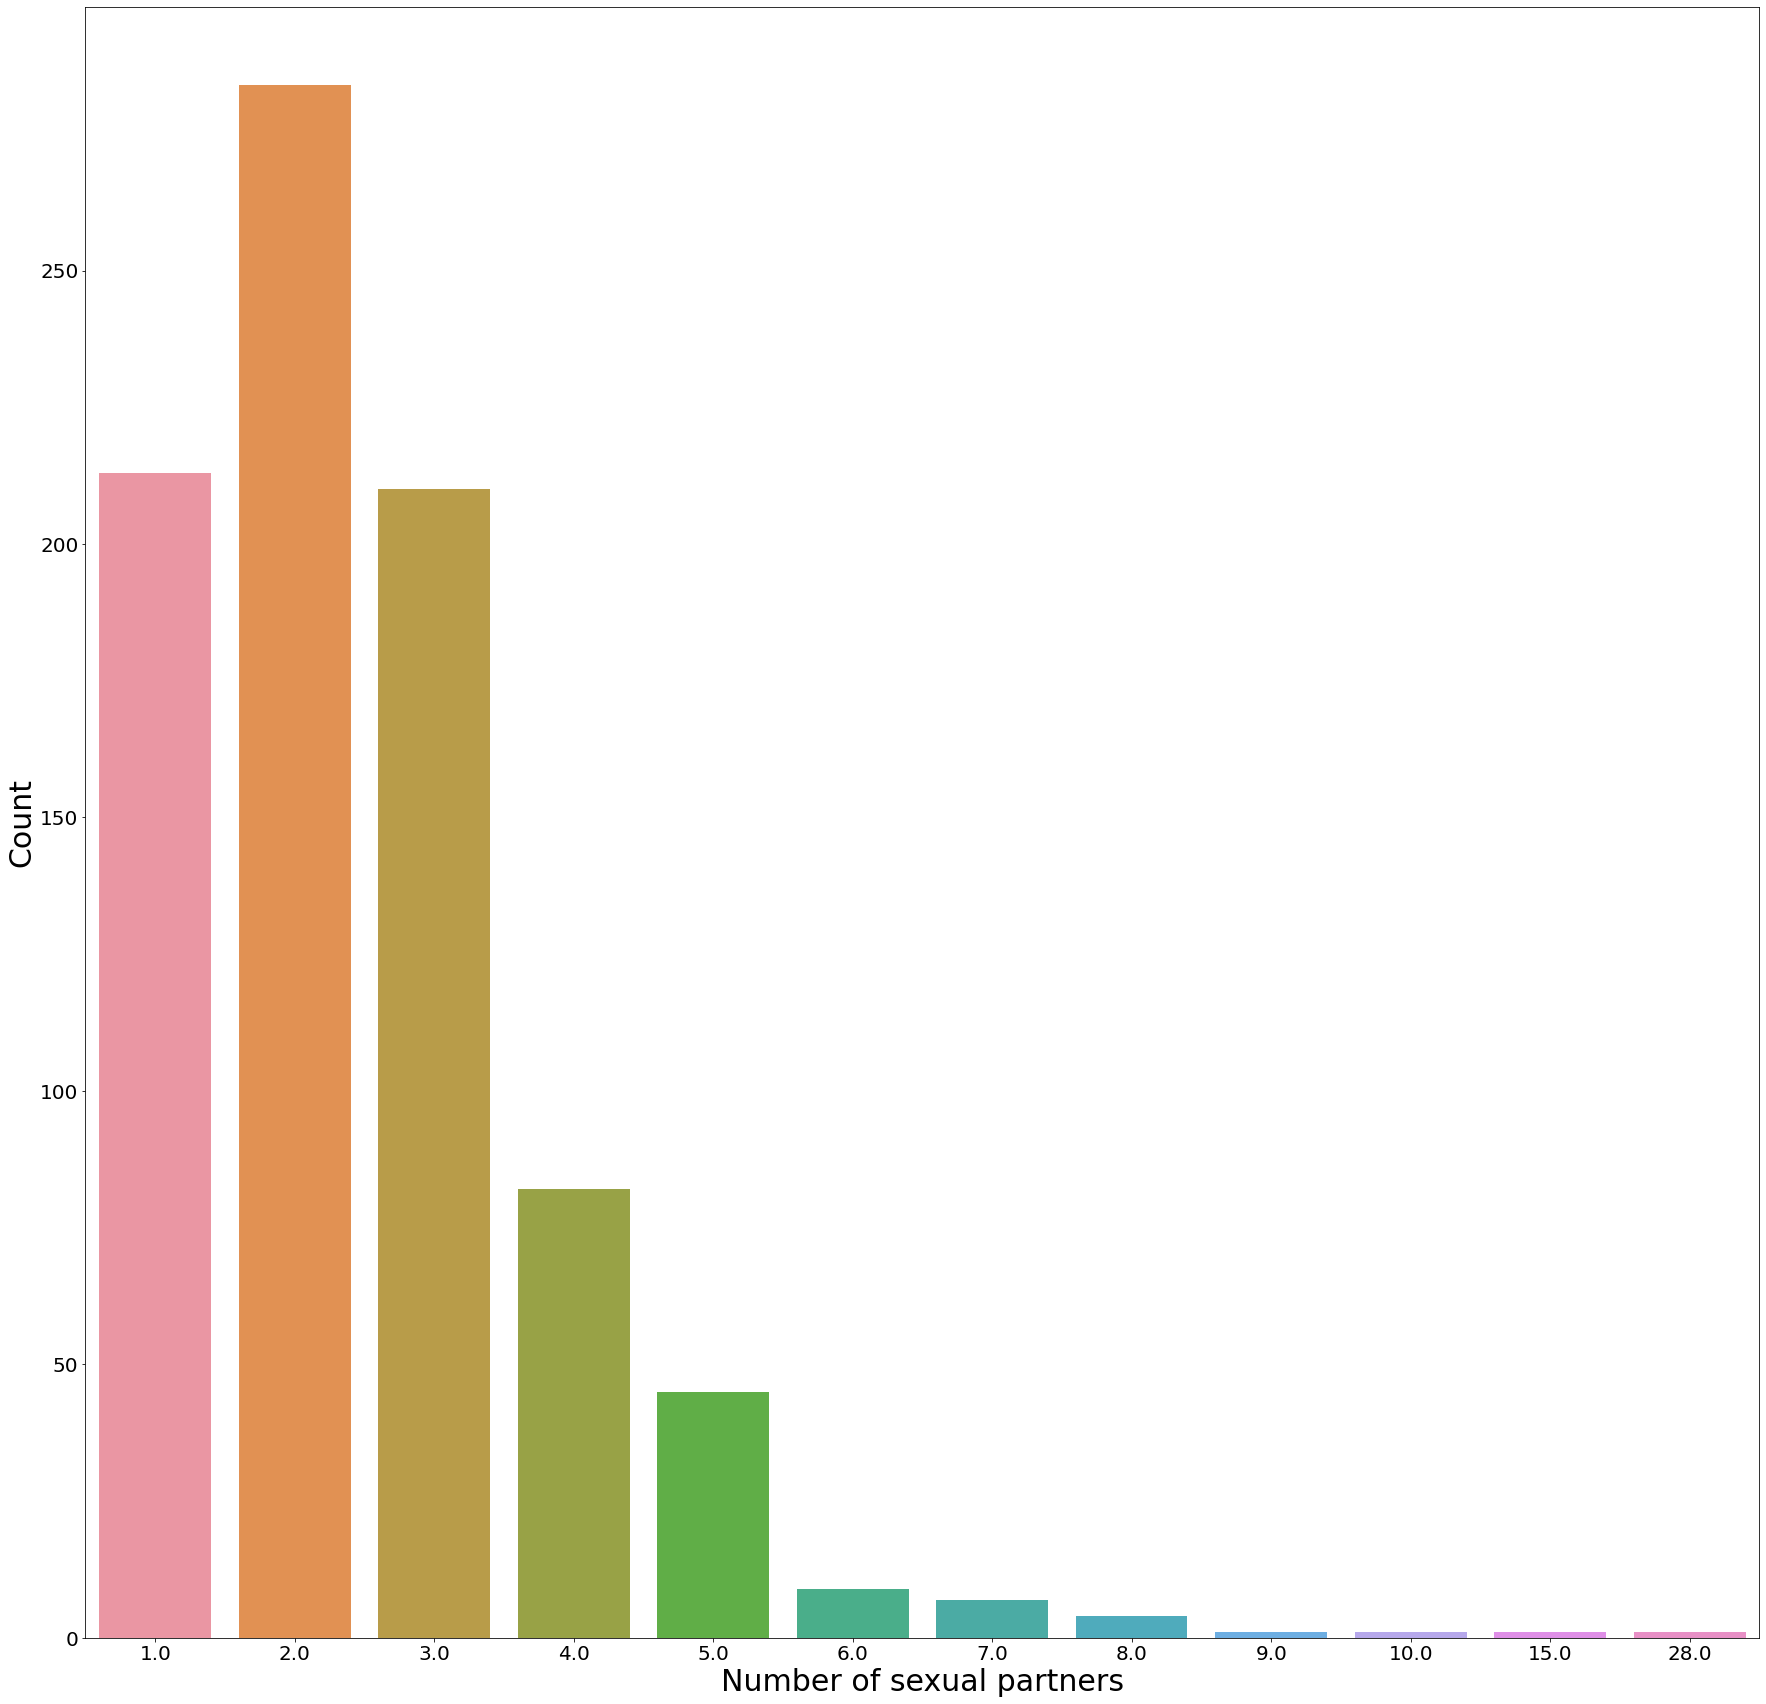

In [162]:
# countplot of 'Number of sexual partners' column
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Number of sexual partners')
plt.xlabel('Number of sexual partners', fontsize = 30, color = 'black')
plt.rc('xtick', labelsize=20, color = 'black')
plt.ylabel('Count', fontsize = 30, color = 'black')
plt.rc('ytick', labelsize=20, color = 'black')

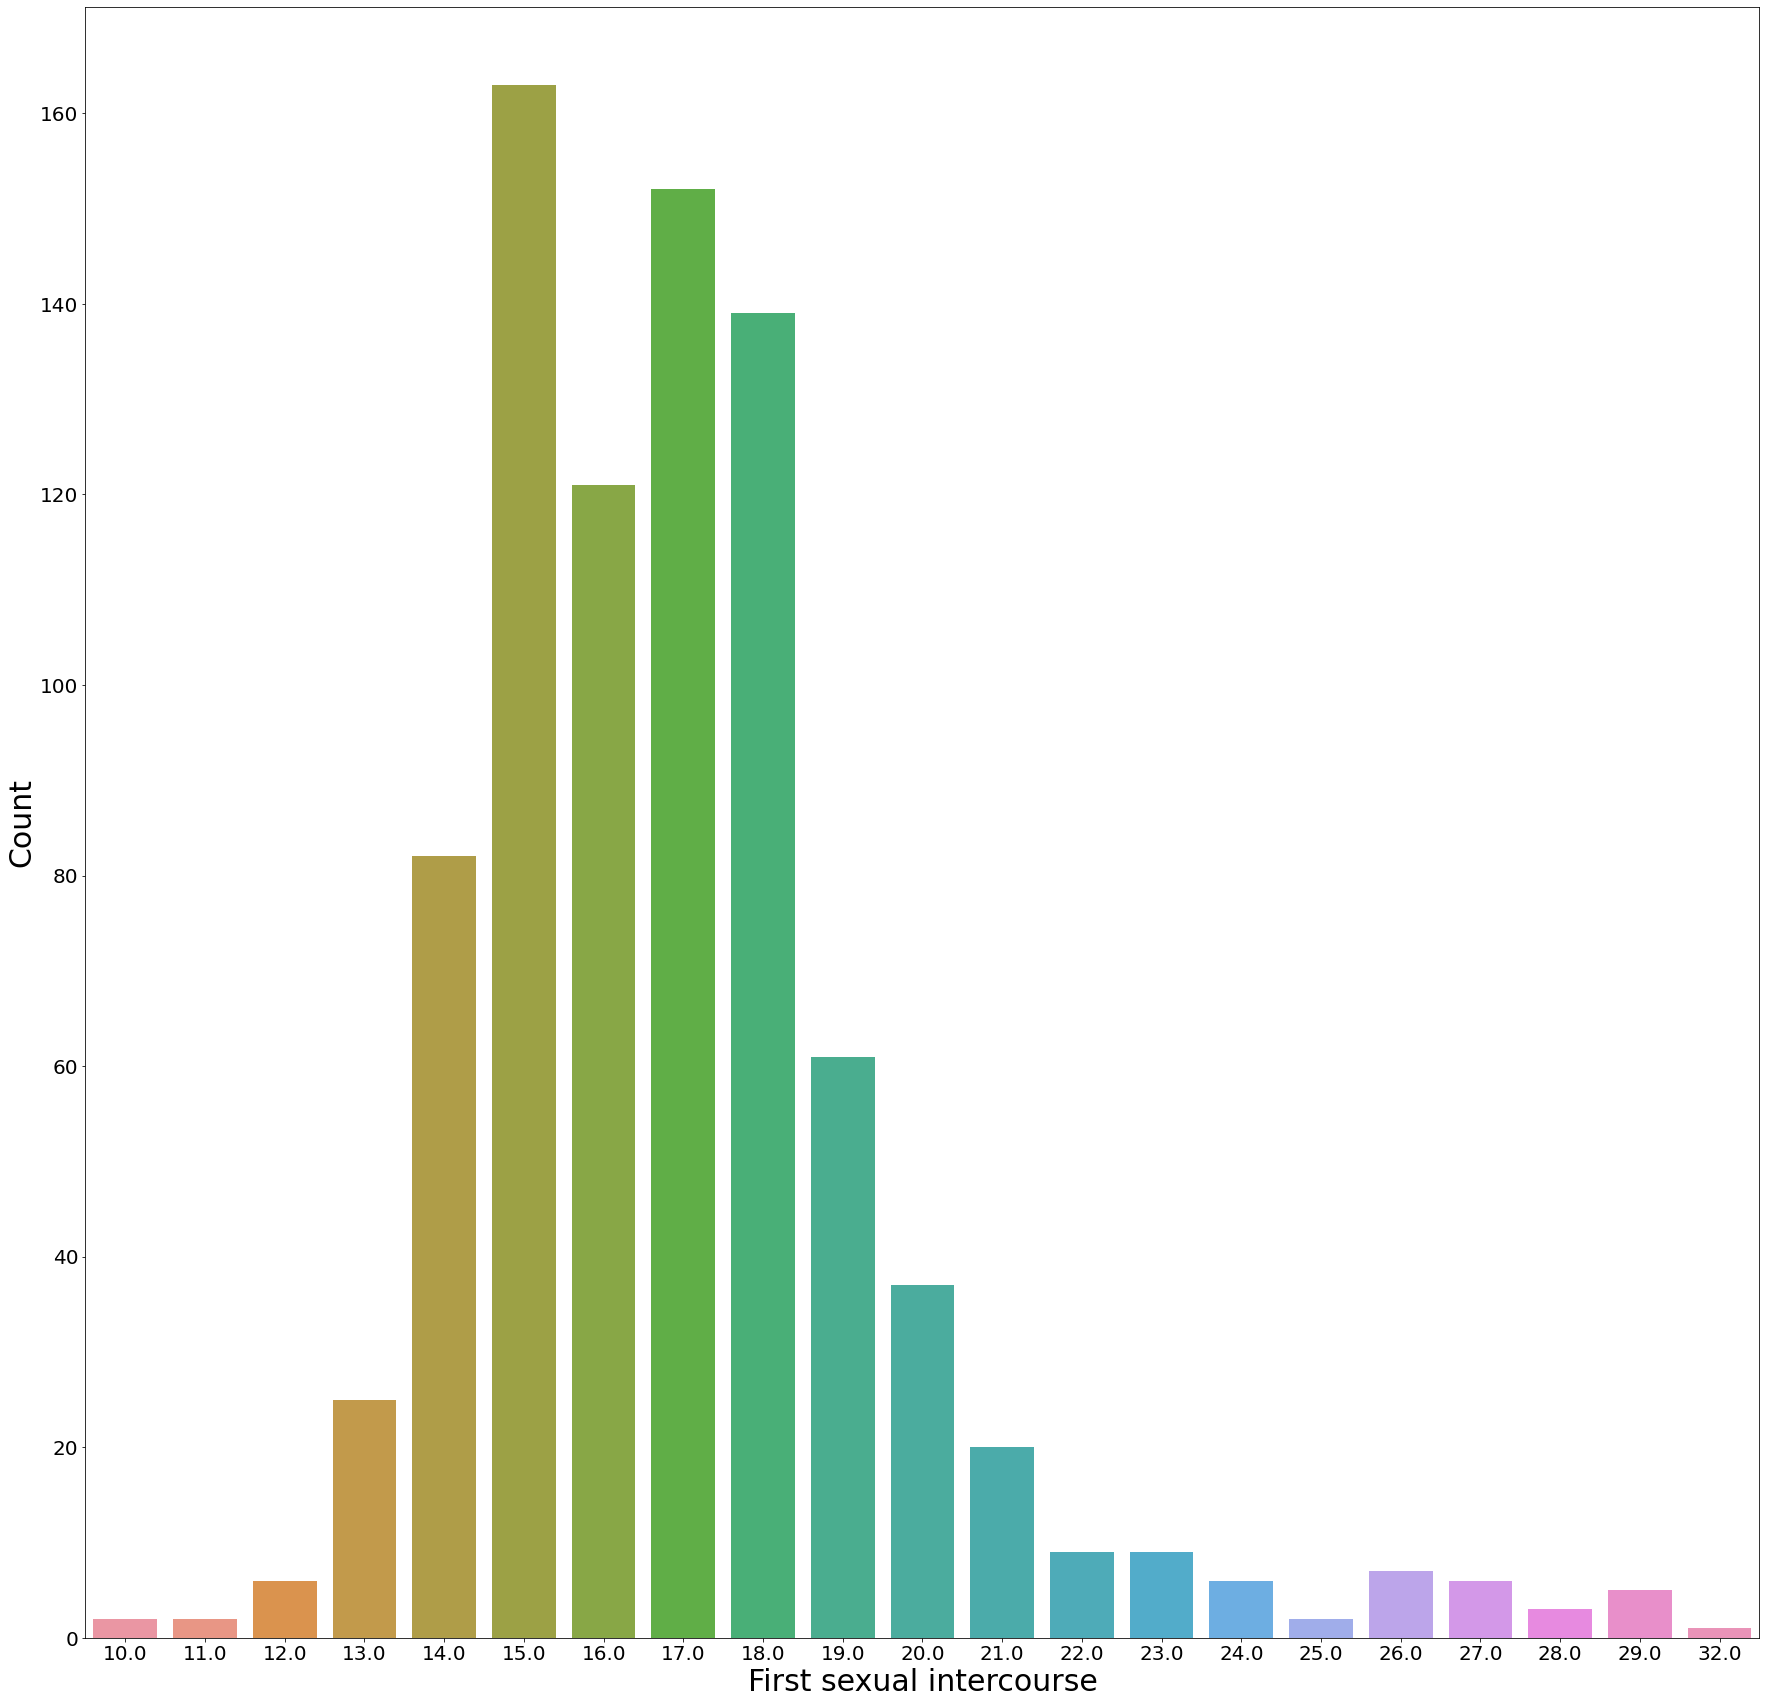

In [163]:
# countplot of 'First sexual intercourse' column
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='First sexual intercourse')
plt.xlabel('First sexual intercourse', fontsize = 30, color = 'black')
plt.rc('xtick', labelsize=20, color = 'black')
plt.ylabel('Count', fontsize = 30, color = 'black')
plt.rc('ytick', labelsize=20, color = 'black')

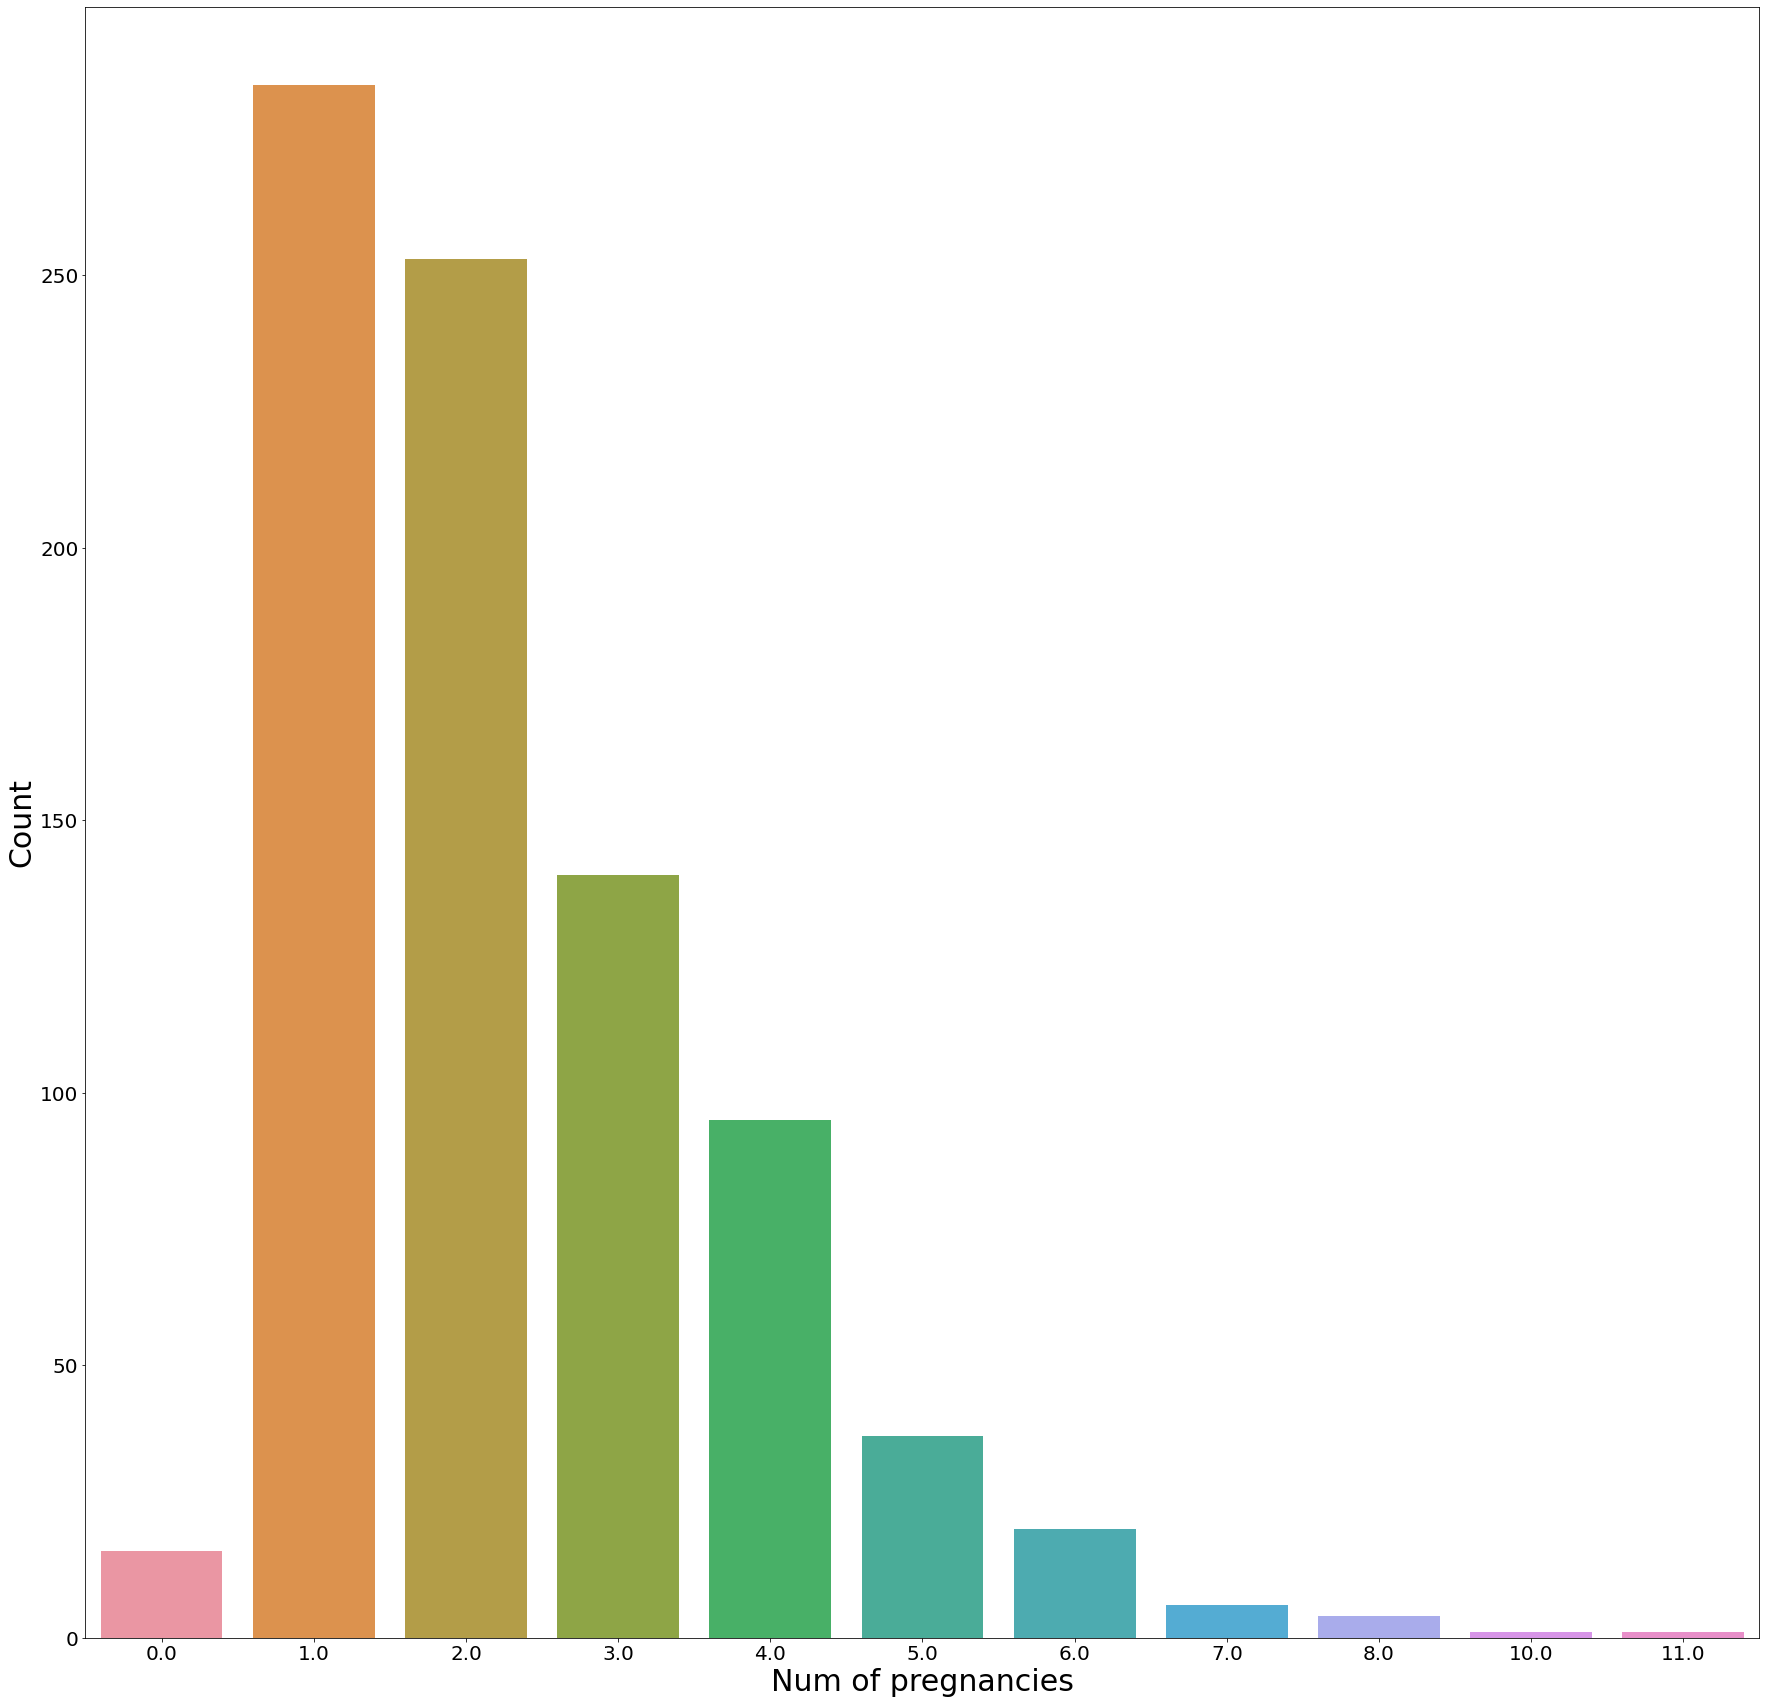

In [164]:
# countplot of 'Num of pregnancies' column
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Num of pregnancies')
plt.xlabel('Num of pregnancies', fontsize = 30, color = 'black')
plt.rc('xtick', labelsize=20, color = 'black')
plt.ylabel('Count', fontsize = 30, color = 'black')
plt.rc('ytick', labelsize=20, color = 'black')

([<matplotlib.patches.Wedge at 0x2981b6d9ac0>,
 [Text(-0.9849962280716752, 0.4896758424555703, '0.0'),
  Text(0.9849962280716754, -0.48967584245556994, '1.0')],
 [Text(-0.5372706698572773, 0.26709591406667466, '85.3%\n(732)'),
  Text(0.5372706698572774, -0.2670959140666745, '14.7%\n(126)')])

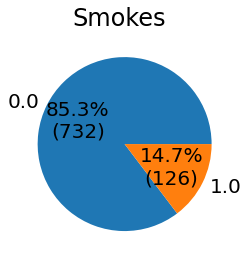

In [165]:
# Pie chart of 'Smokes' column to investigate the percentage of people who smokes.
plt.suptitle ('Smokes')

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

x = data4['Smokes'].value_counts()
plt.pie(x,labels = x.index, autopct=autopct_format(x))

([<matplotlib.patches.Wedge at 0x2981b2a8130>,
 [Text(-0.9849962280716752, 0.4896758424555703, '0.0'),
  Text(0.9849962280716754, -0.48967584245556994, '1.0')],
 [Text(-0.5372706698572773, 0.26709591406667466, '85.3%\n(732)'),
  Text(0.5372706698572774, -0.2670959140666745, '14.7%\n(126)')])

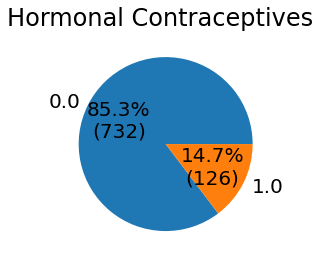

In [166]:
# Pie chart of 'Hormonal Contraceptives' column to investigate the percentage of people who have Hormonal Contraceptives.
plt.suptitle ('Hormonal Contraceptives')

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

x = data4['Smokes'].value_counts()
plt.pie(x,labels = x.index, autopct=autopct_format(x))

([<matplotlib.patches.Wedge at 0x2981b660a30>,
 [Text(-0.9849962280716752, 0.4896758424555703, '0.0'),
  Text(0.9849962280716754, -0.48967584245556994, '1.0')],
 [Text(-0.5372706698572773, 0.26709591406667466, '85.3%\n(732)'),
  Text(0.5372706698572774, -0.2670959140666745, '14.7%\n(126)')])

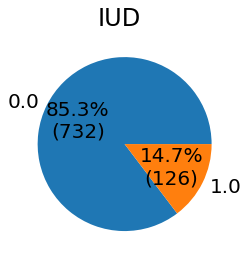

In [167]:
# Pie chart of 'IUD' column.
plt.suptitle ('IUD')

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

x = data4['Smokes'].value_counts()
plt.pie(x,labels = x.index, autopct=autopct_format(x))

([<matplotlib.patches.Wedge at 0x2981d457250>,
 [Text(-0.9849962280716752, 0.4896758424555703, '0.0'),
  Text(0.9849962280716754, -0.48967584245556994, '1.0')],
 [Text(-0.5372706698572773, 0.26709591406667466, '85.3%\n(732)'),
  Text(0.5372706698572774, -0.2670959140666745, '14.7%\n(126)')])

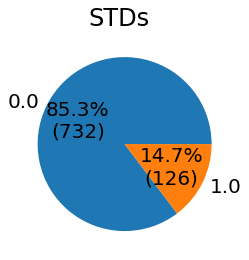

In [168]:
# Pie chart of 'STDs' column.
plt.suptitle ('STDs')

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

x = data4['Smokes'].value_counts()
plt.pie(x,labels = x.index, autopct=autopct_format(x))

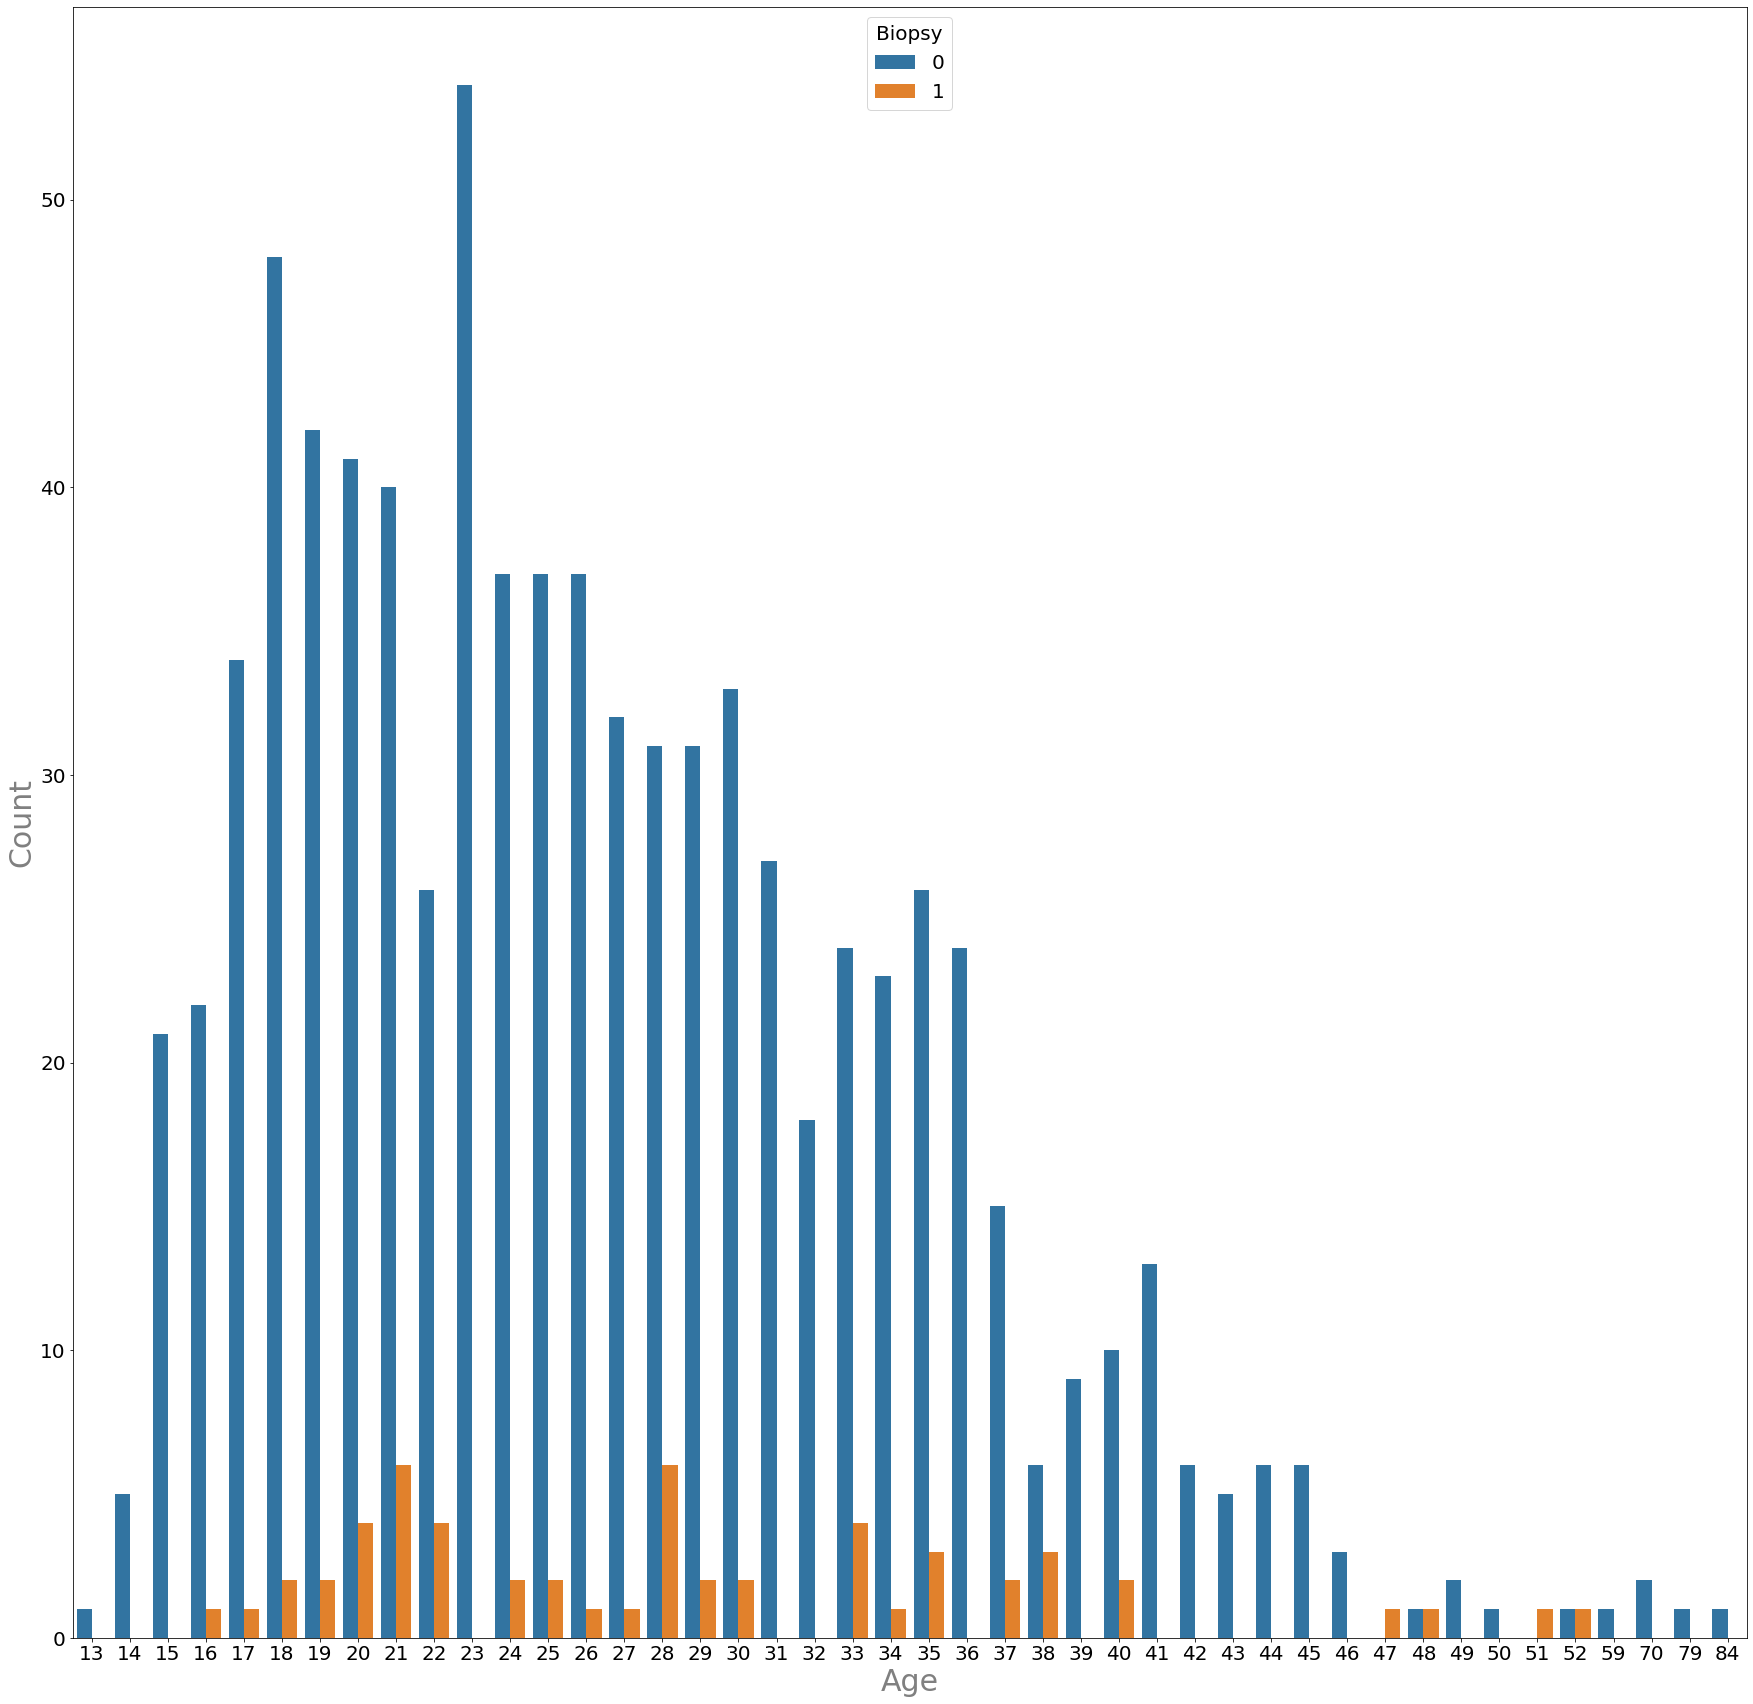

In [169]:
# Countplot of 'Age' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Age',hue='Biopsy')
plt.xlabel('Age', fontsize = 30, color = 'grey')
plt.rc('xtick', labelsize=20, color = 'grey')
plt.ylabel('Count', fontsize = 30, color = 'grey')
plt.rc('ytick', labelsize=20, color = 'grey')

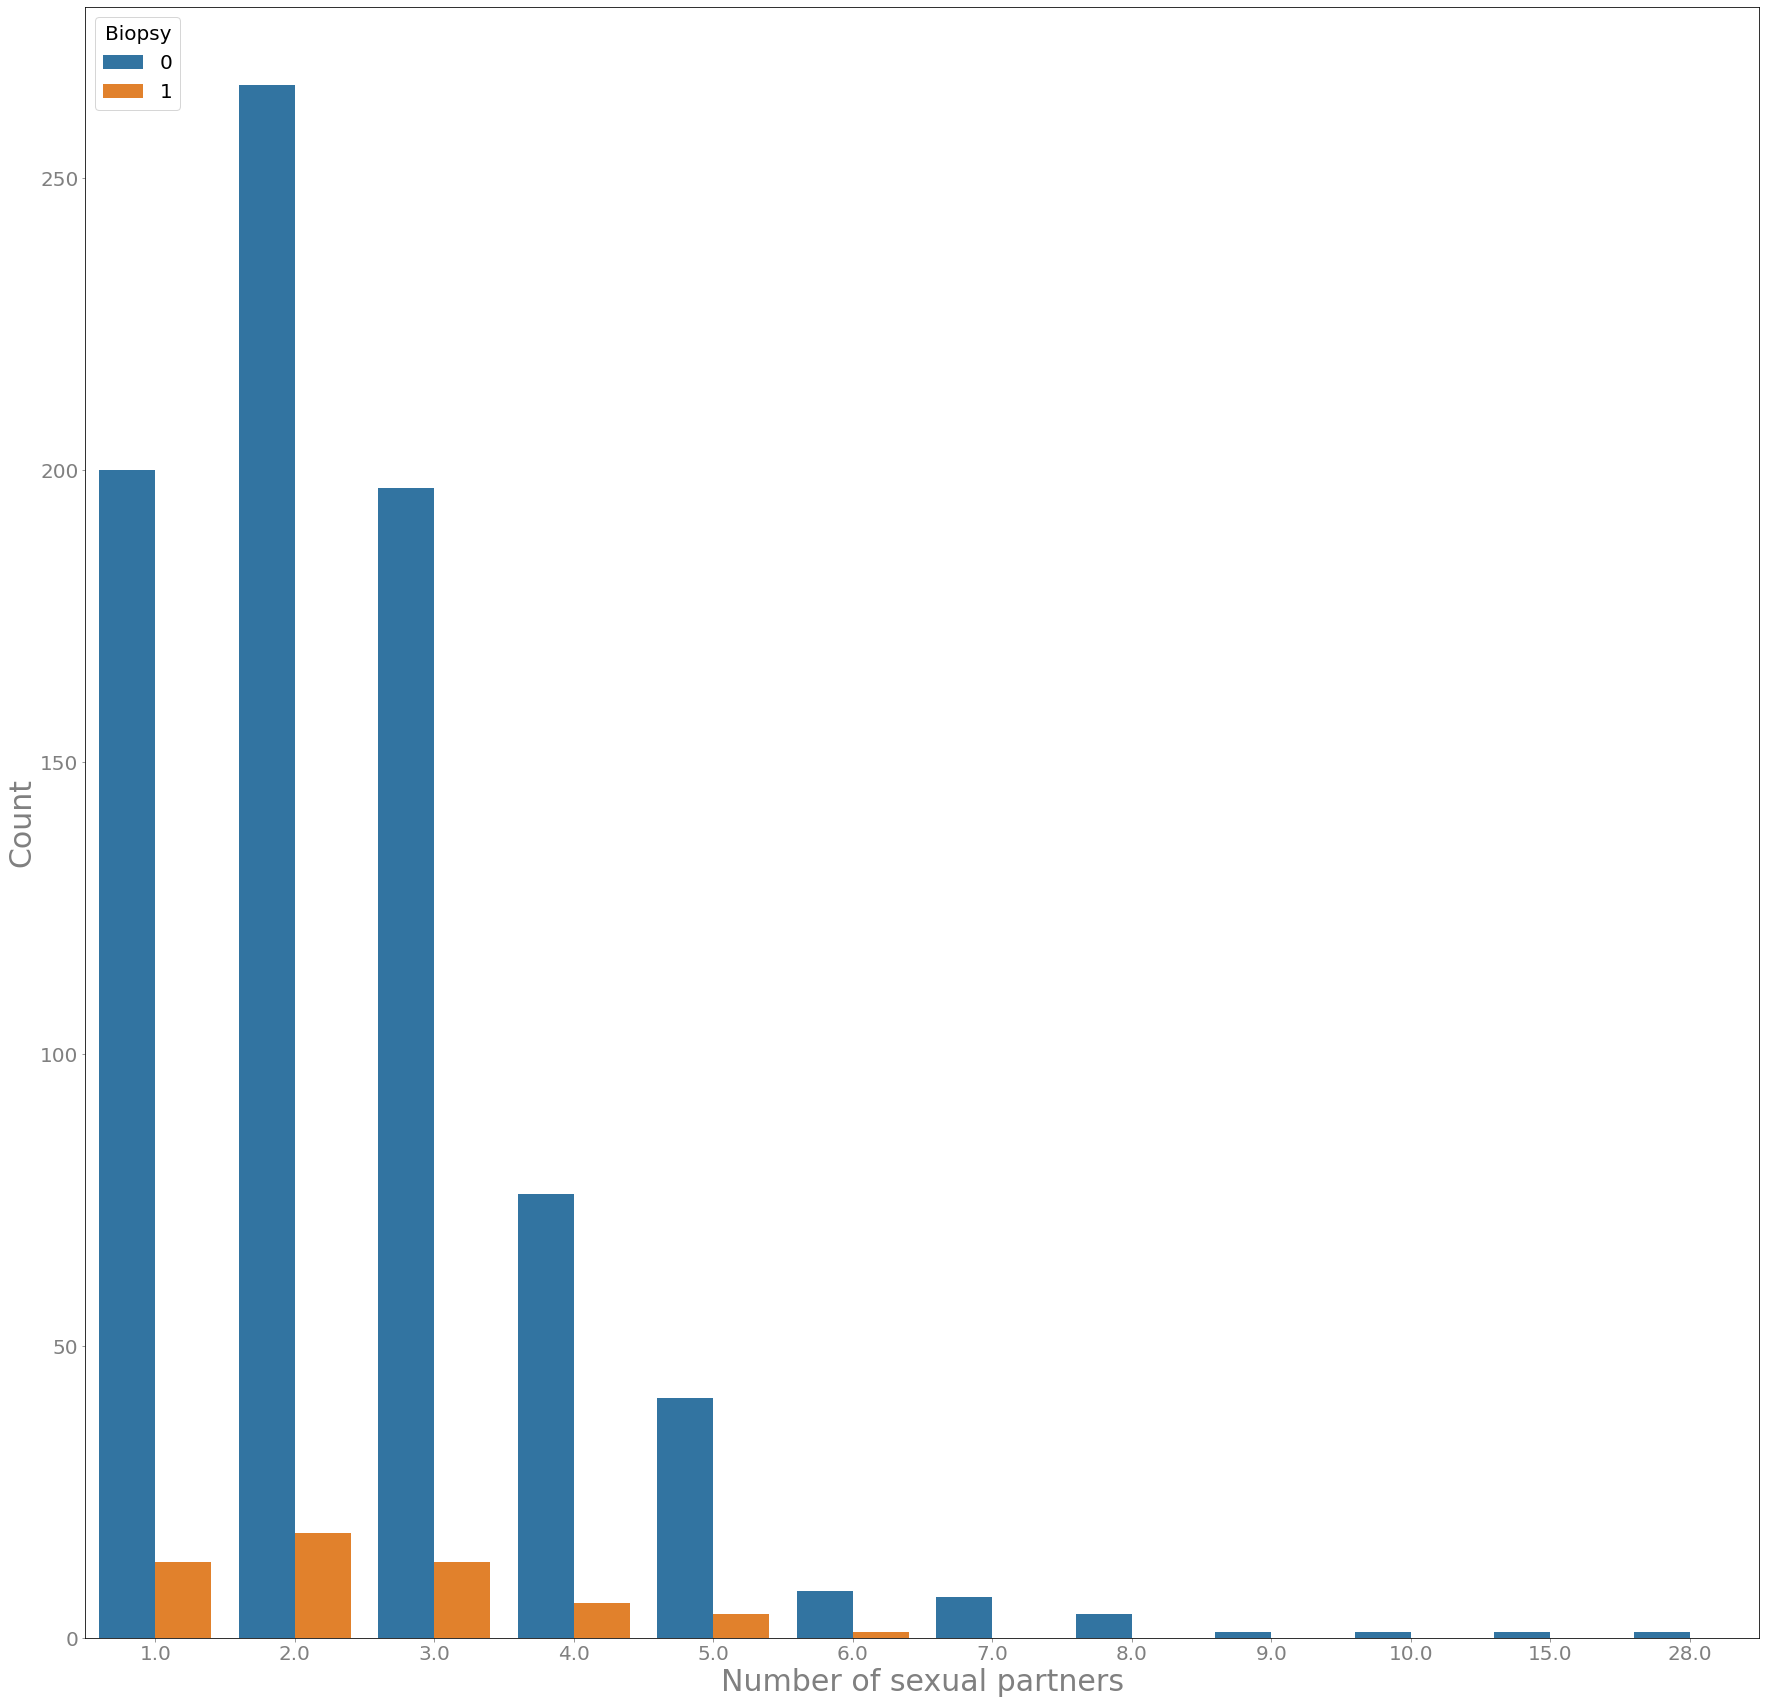

In [170]:
# Countplot of 'Number of sexual partners' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Number of sexual partners',hue='Biopsy')
plt.xlabel('Number of sexual partners', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

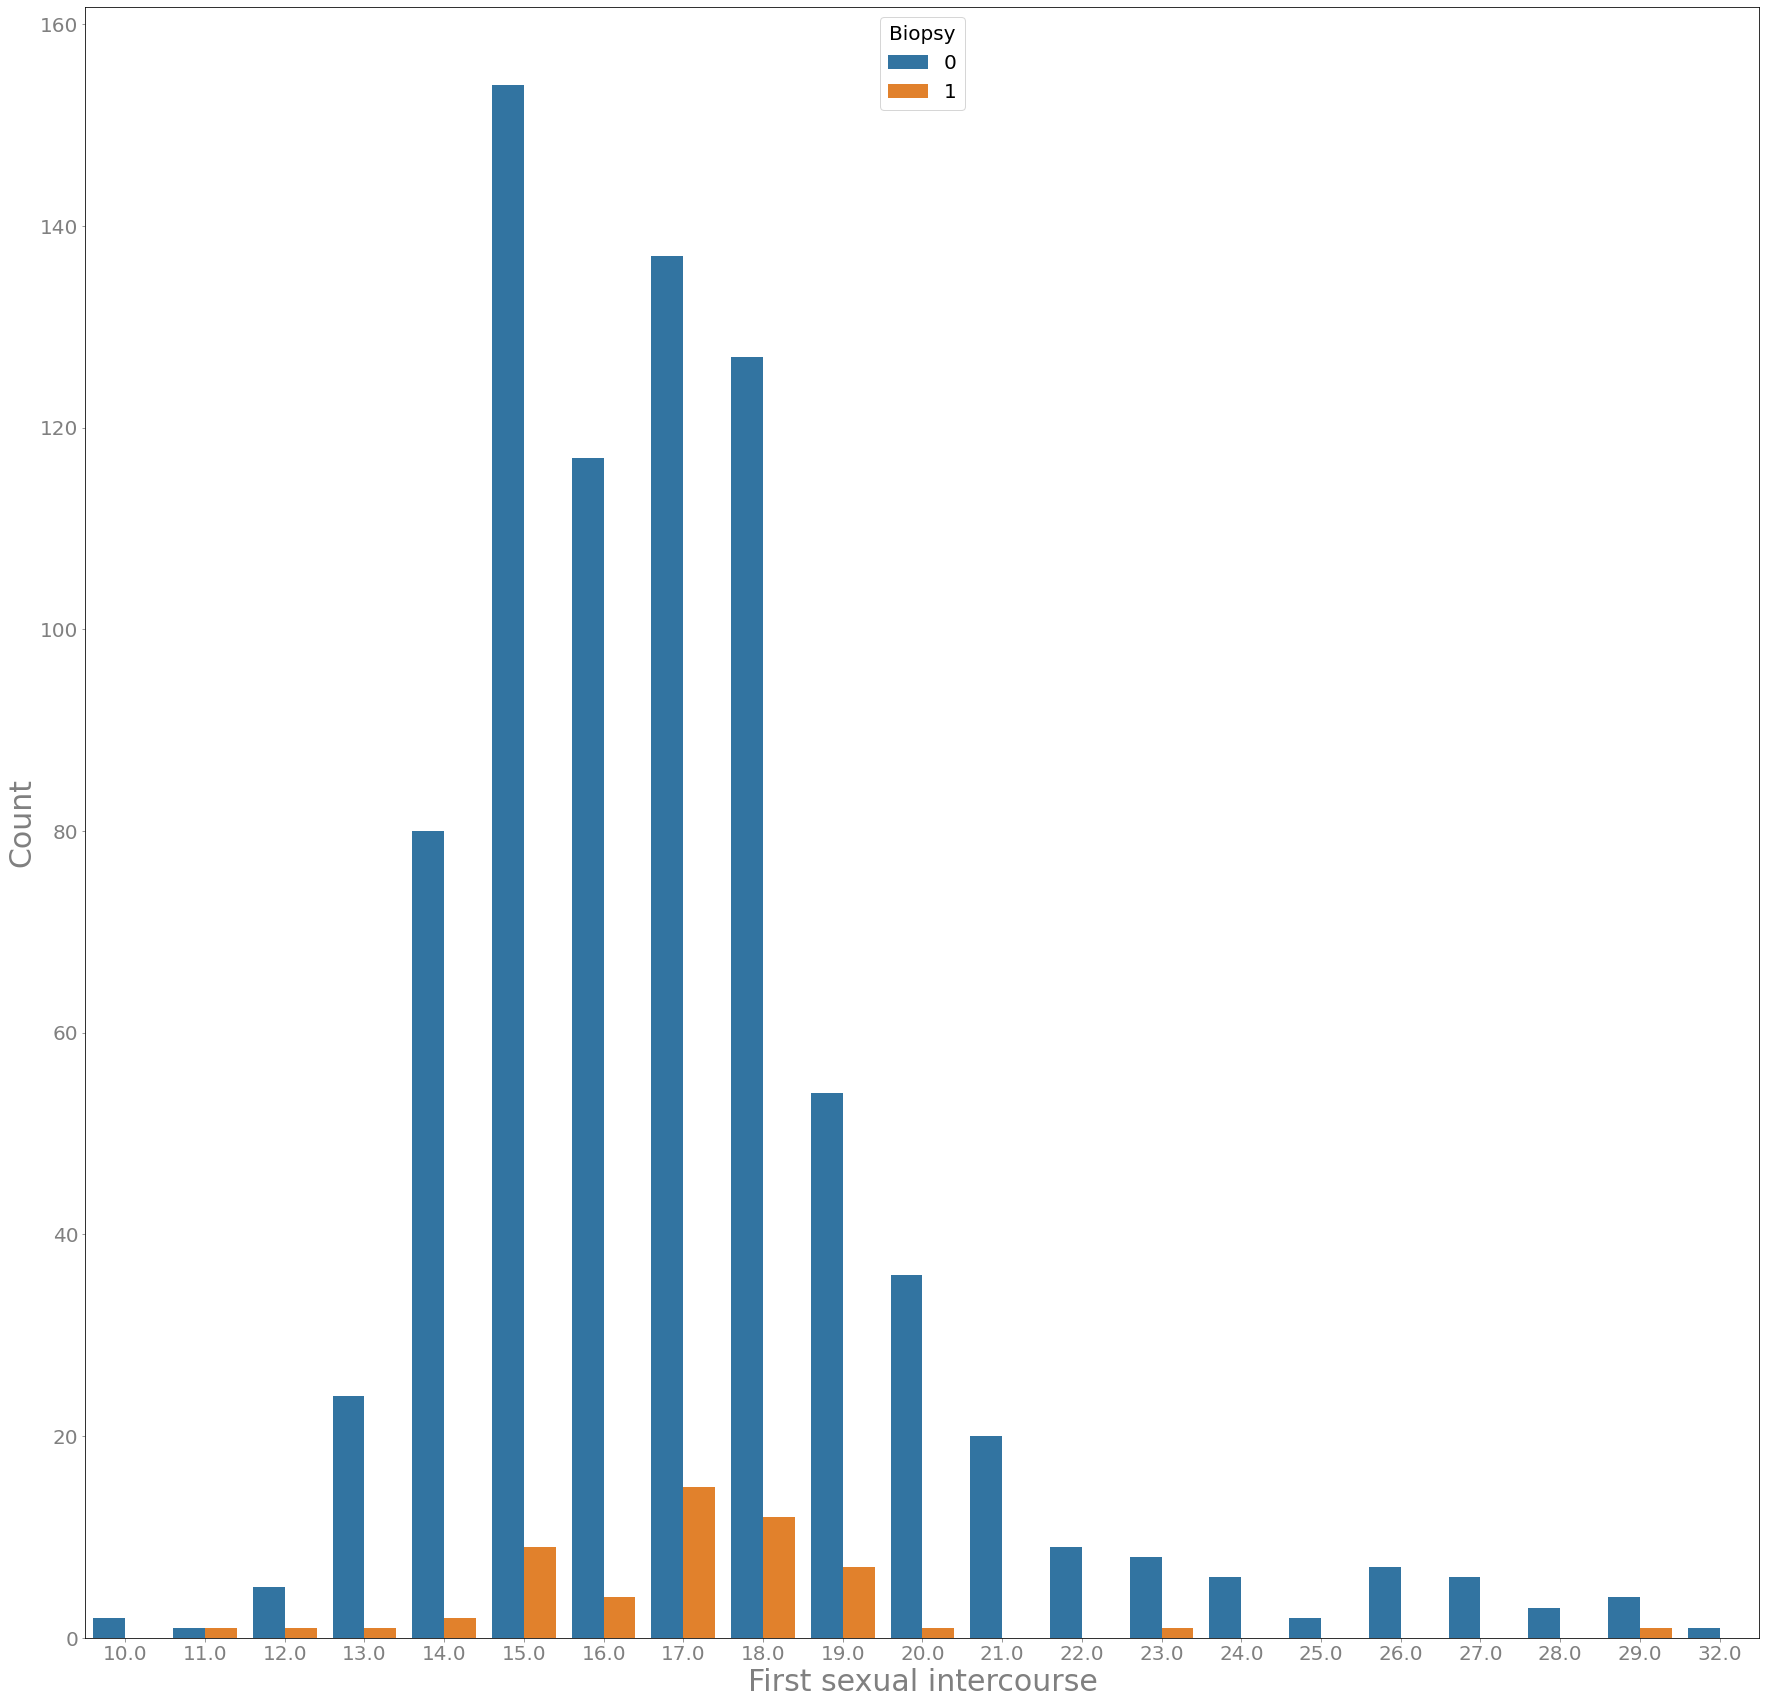

In [171]:
# Countplot of 'First sexual intercourse' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='First sexual intercourse',hue='Biopsy')
plt.xlabel('First sexual intercourse', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

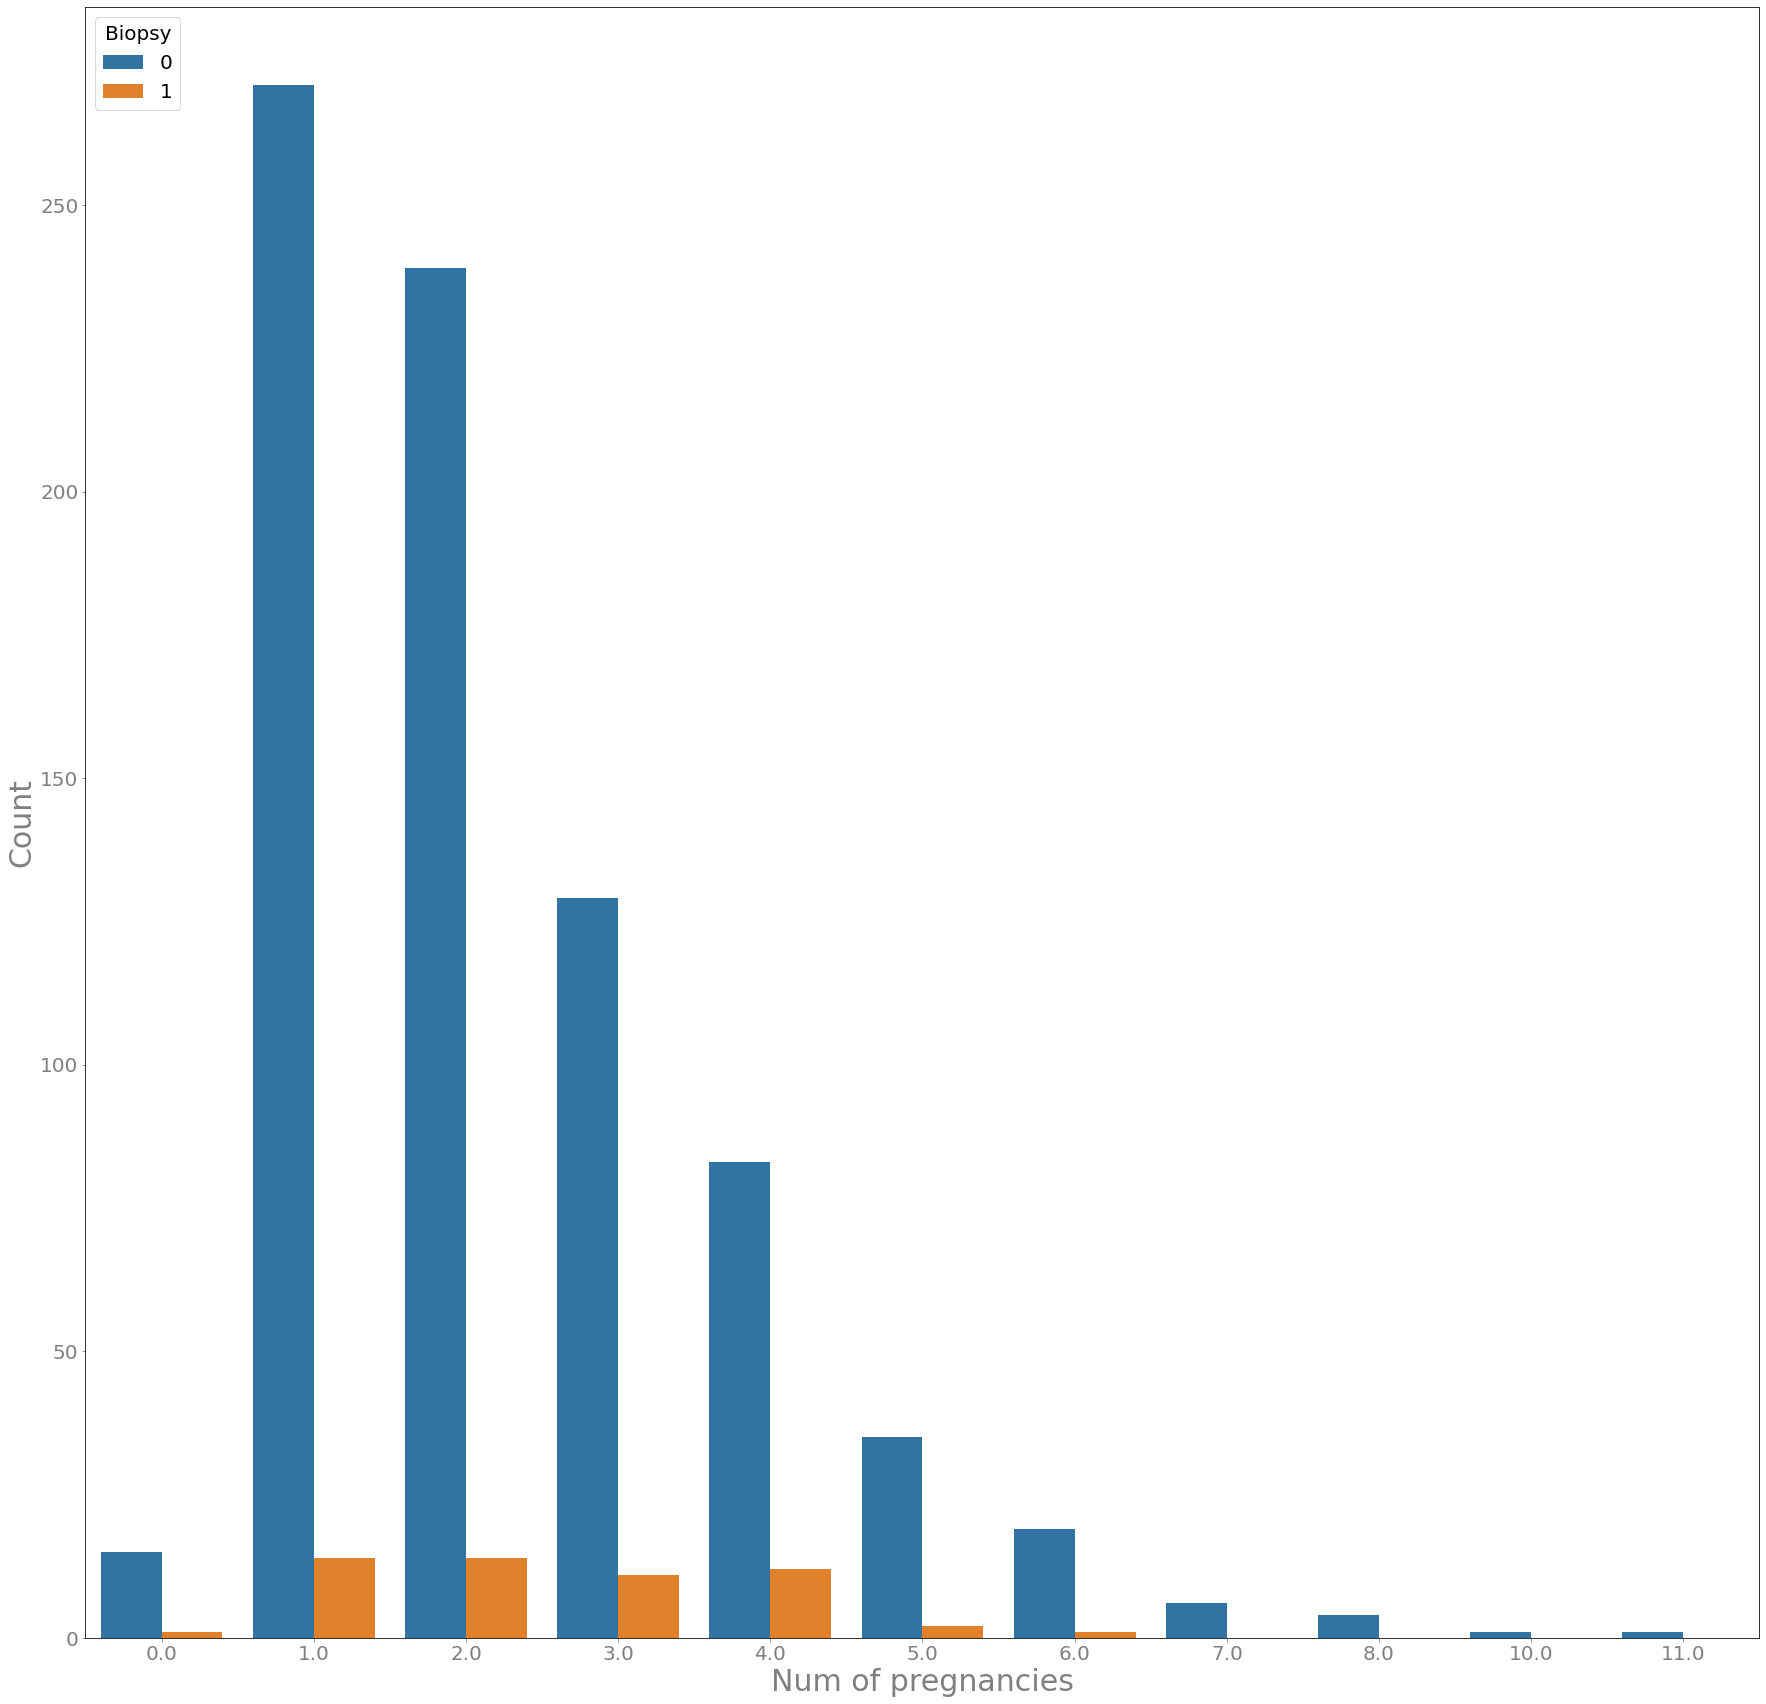

In [172]:
# Countplot of 'Num of pregnancies' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Num of pregnancies',hue='Biopsy')
plt.xlabel('Num of pregnancies', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

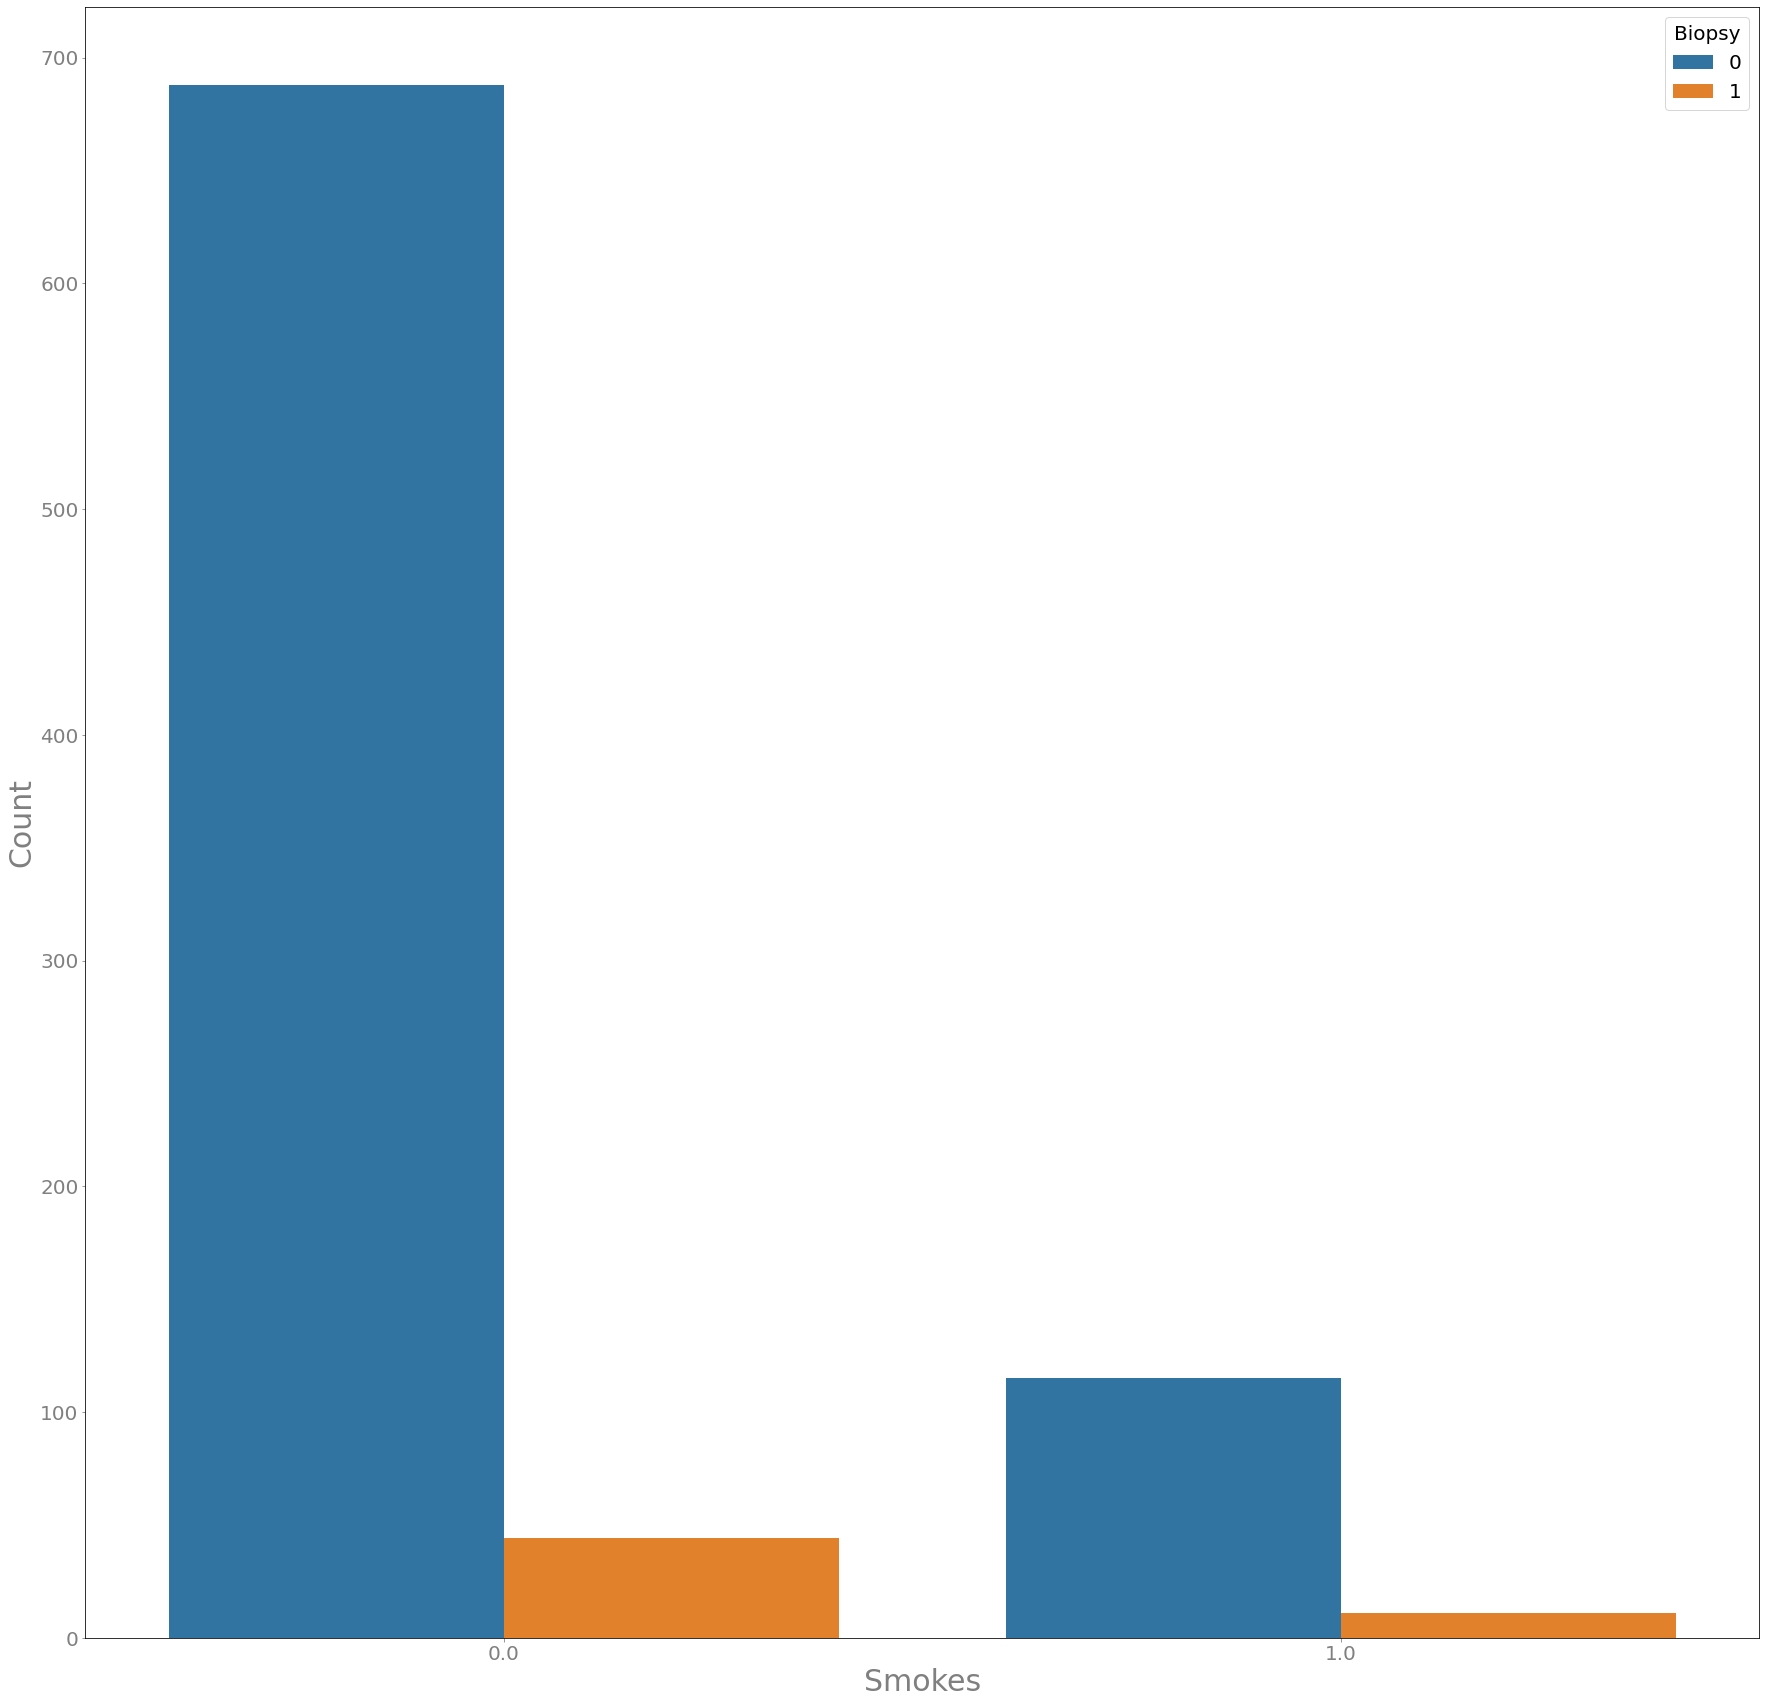

In [173]:
# Countplot of 'Smokes' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Smokes',hue='Biopsy')
plt.xlabel('Smokes', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

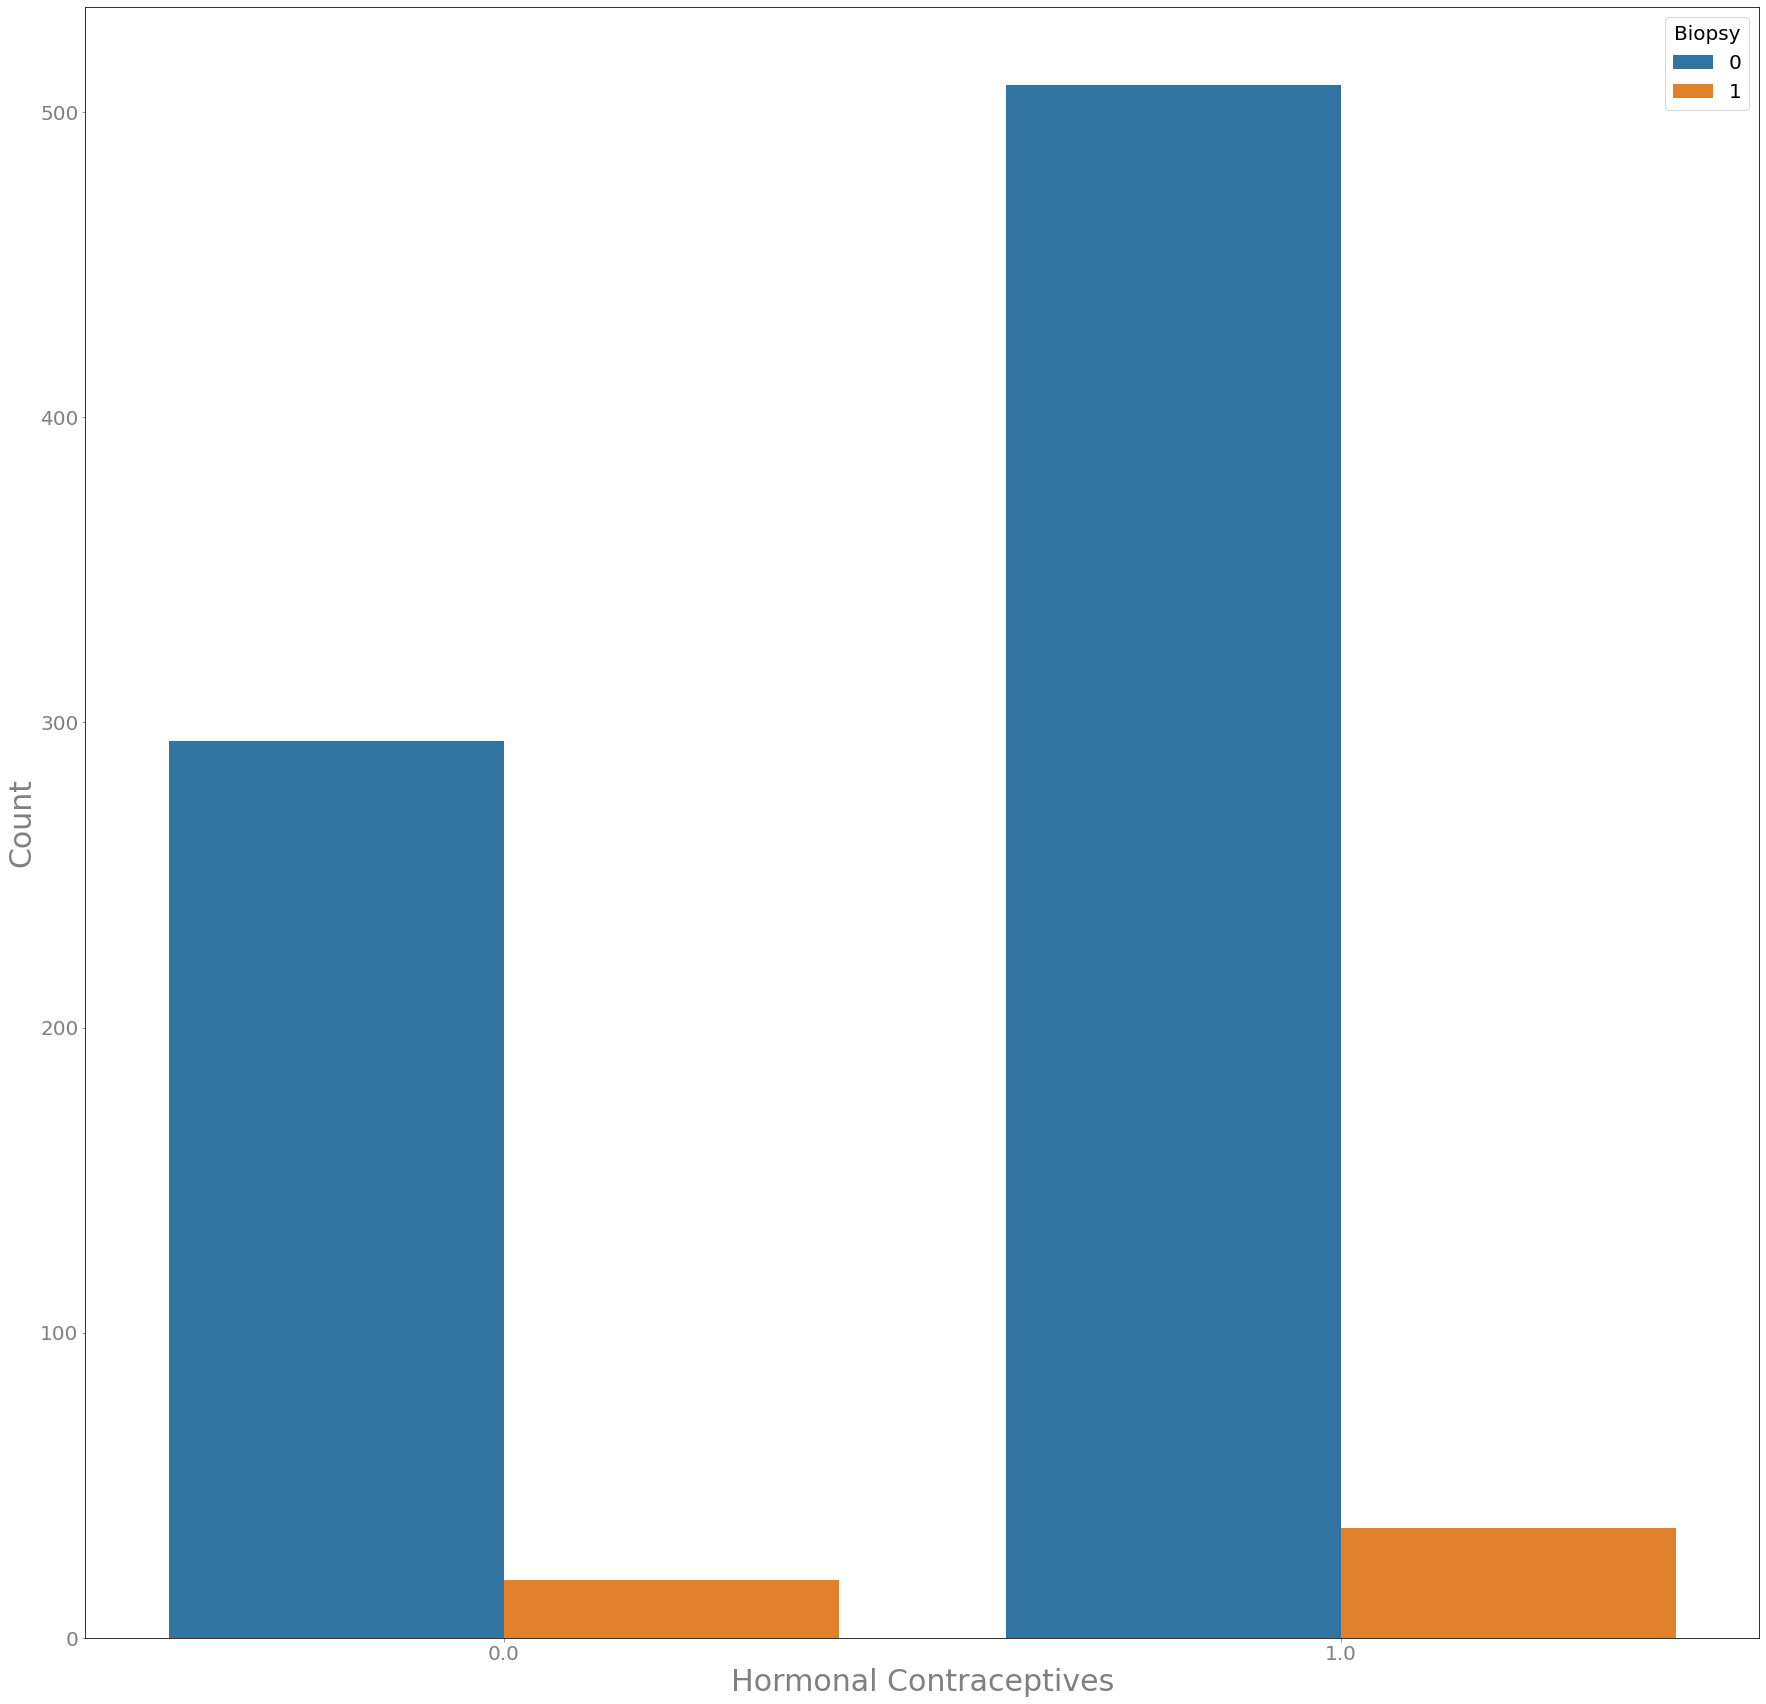

In [174]:
# Countplot of 'Hormonal Contraceptives' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='Hormonal Contraceptives',hue='Biopsy')
plt.xlabel('Hormonal Contraceptives', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

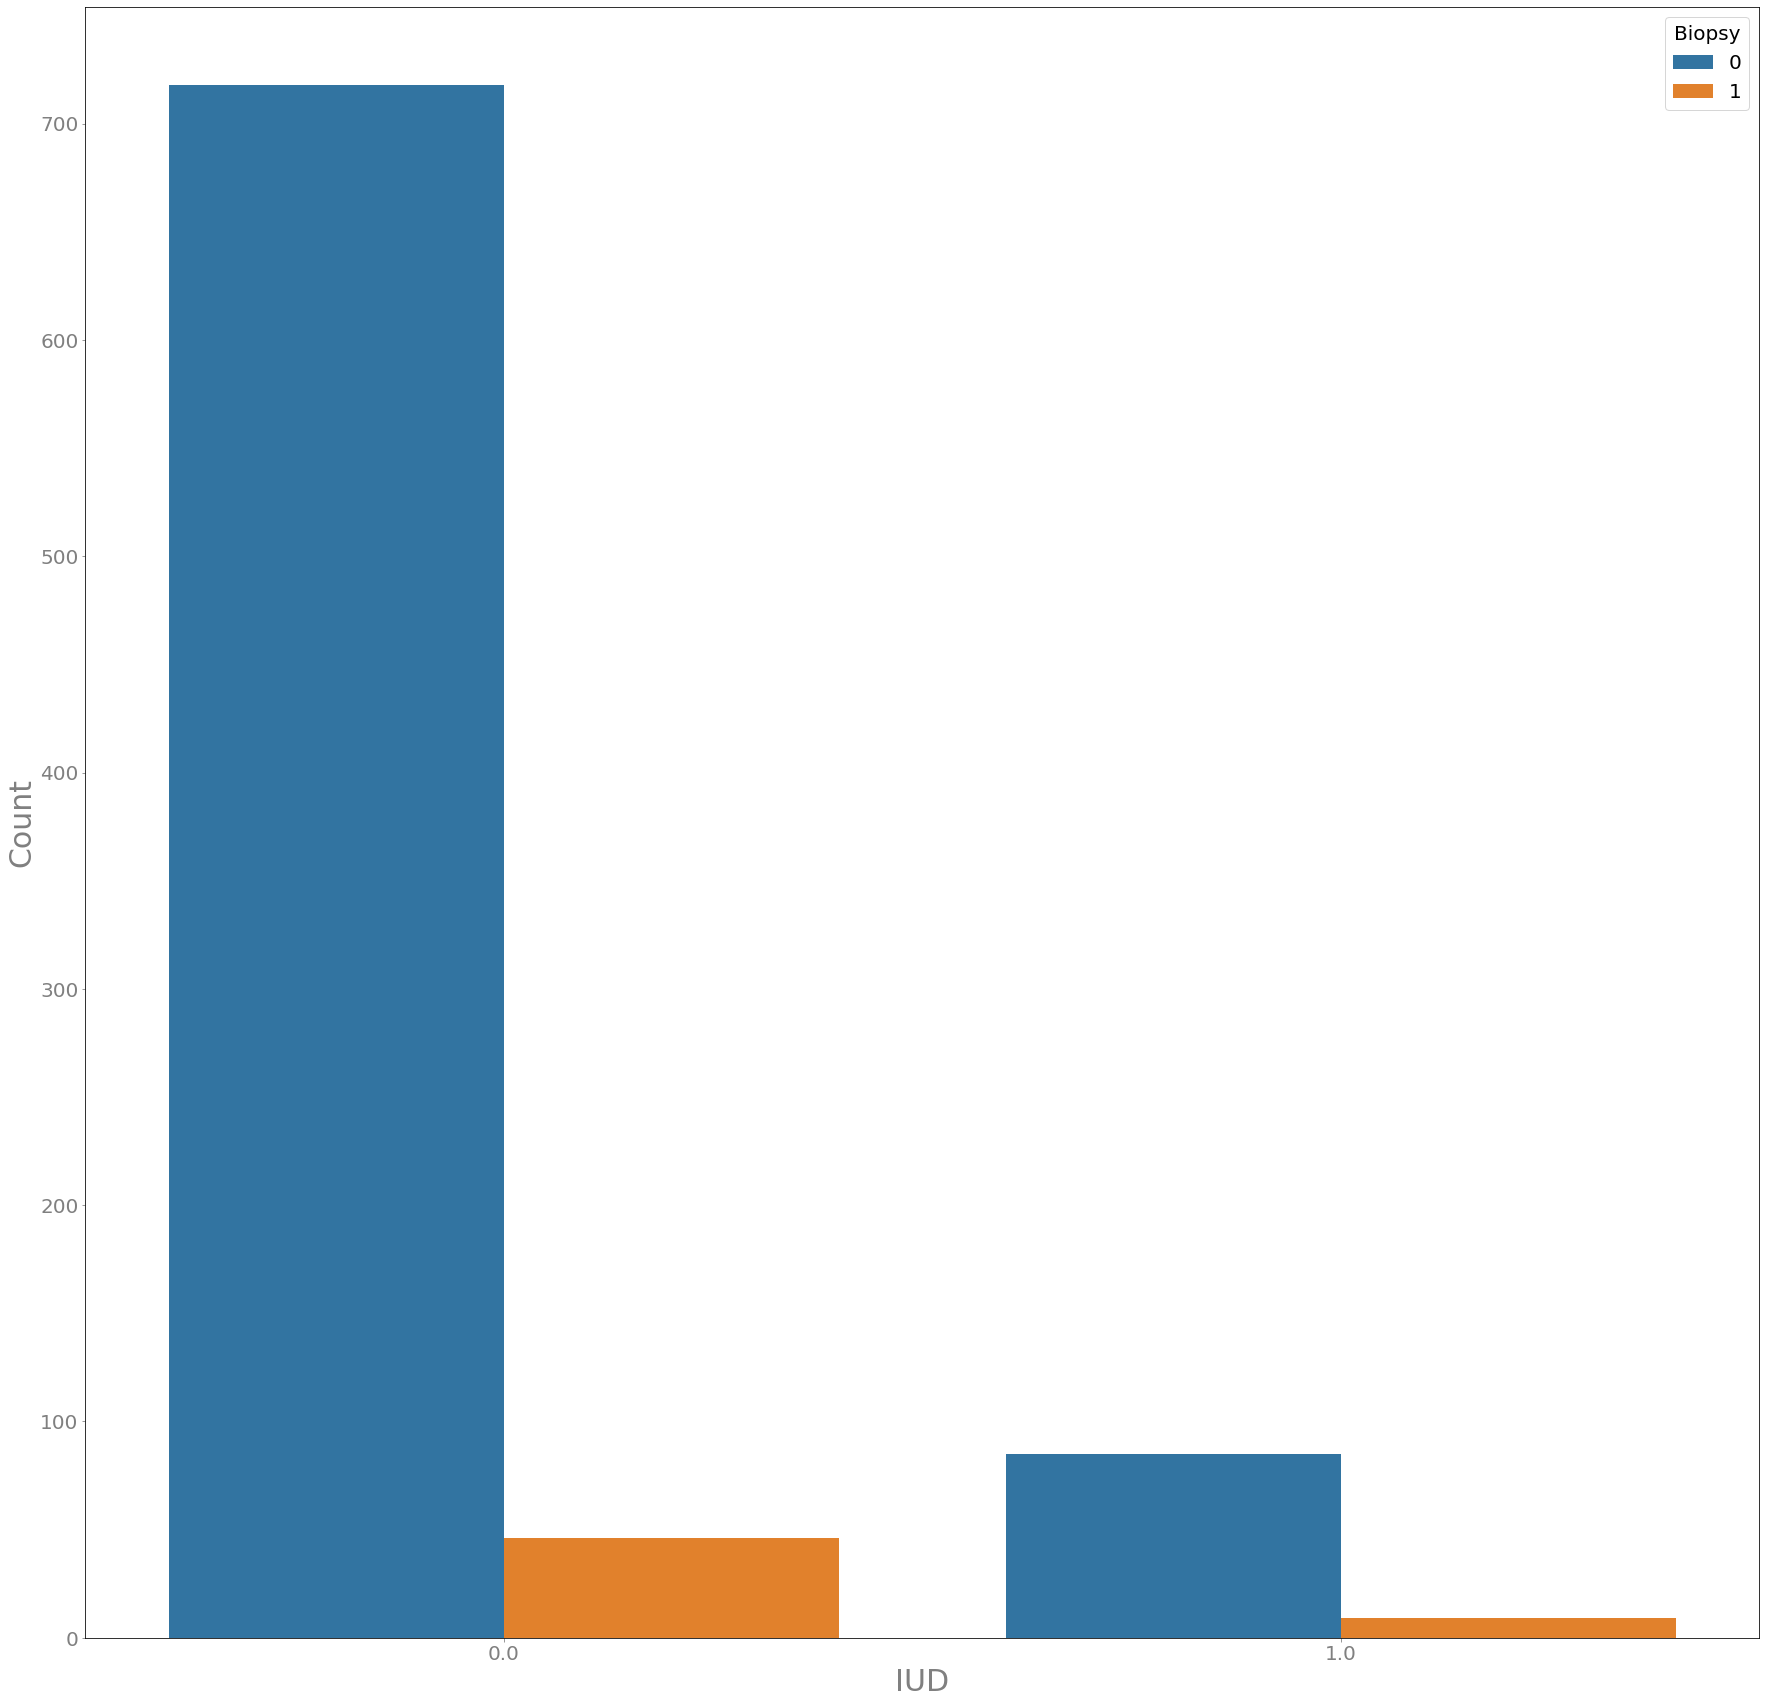

In [175]:
# Countplot of 'IUD' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='IUD',hue='Biopsy')
plt.xlabel('IUD', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

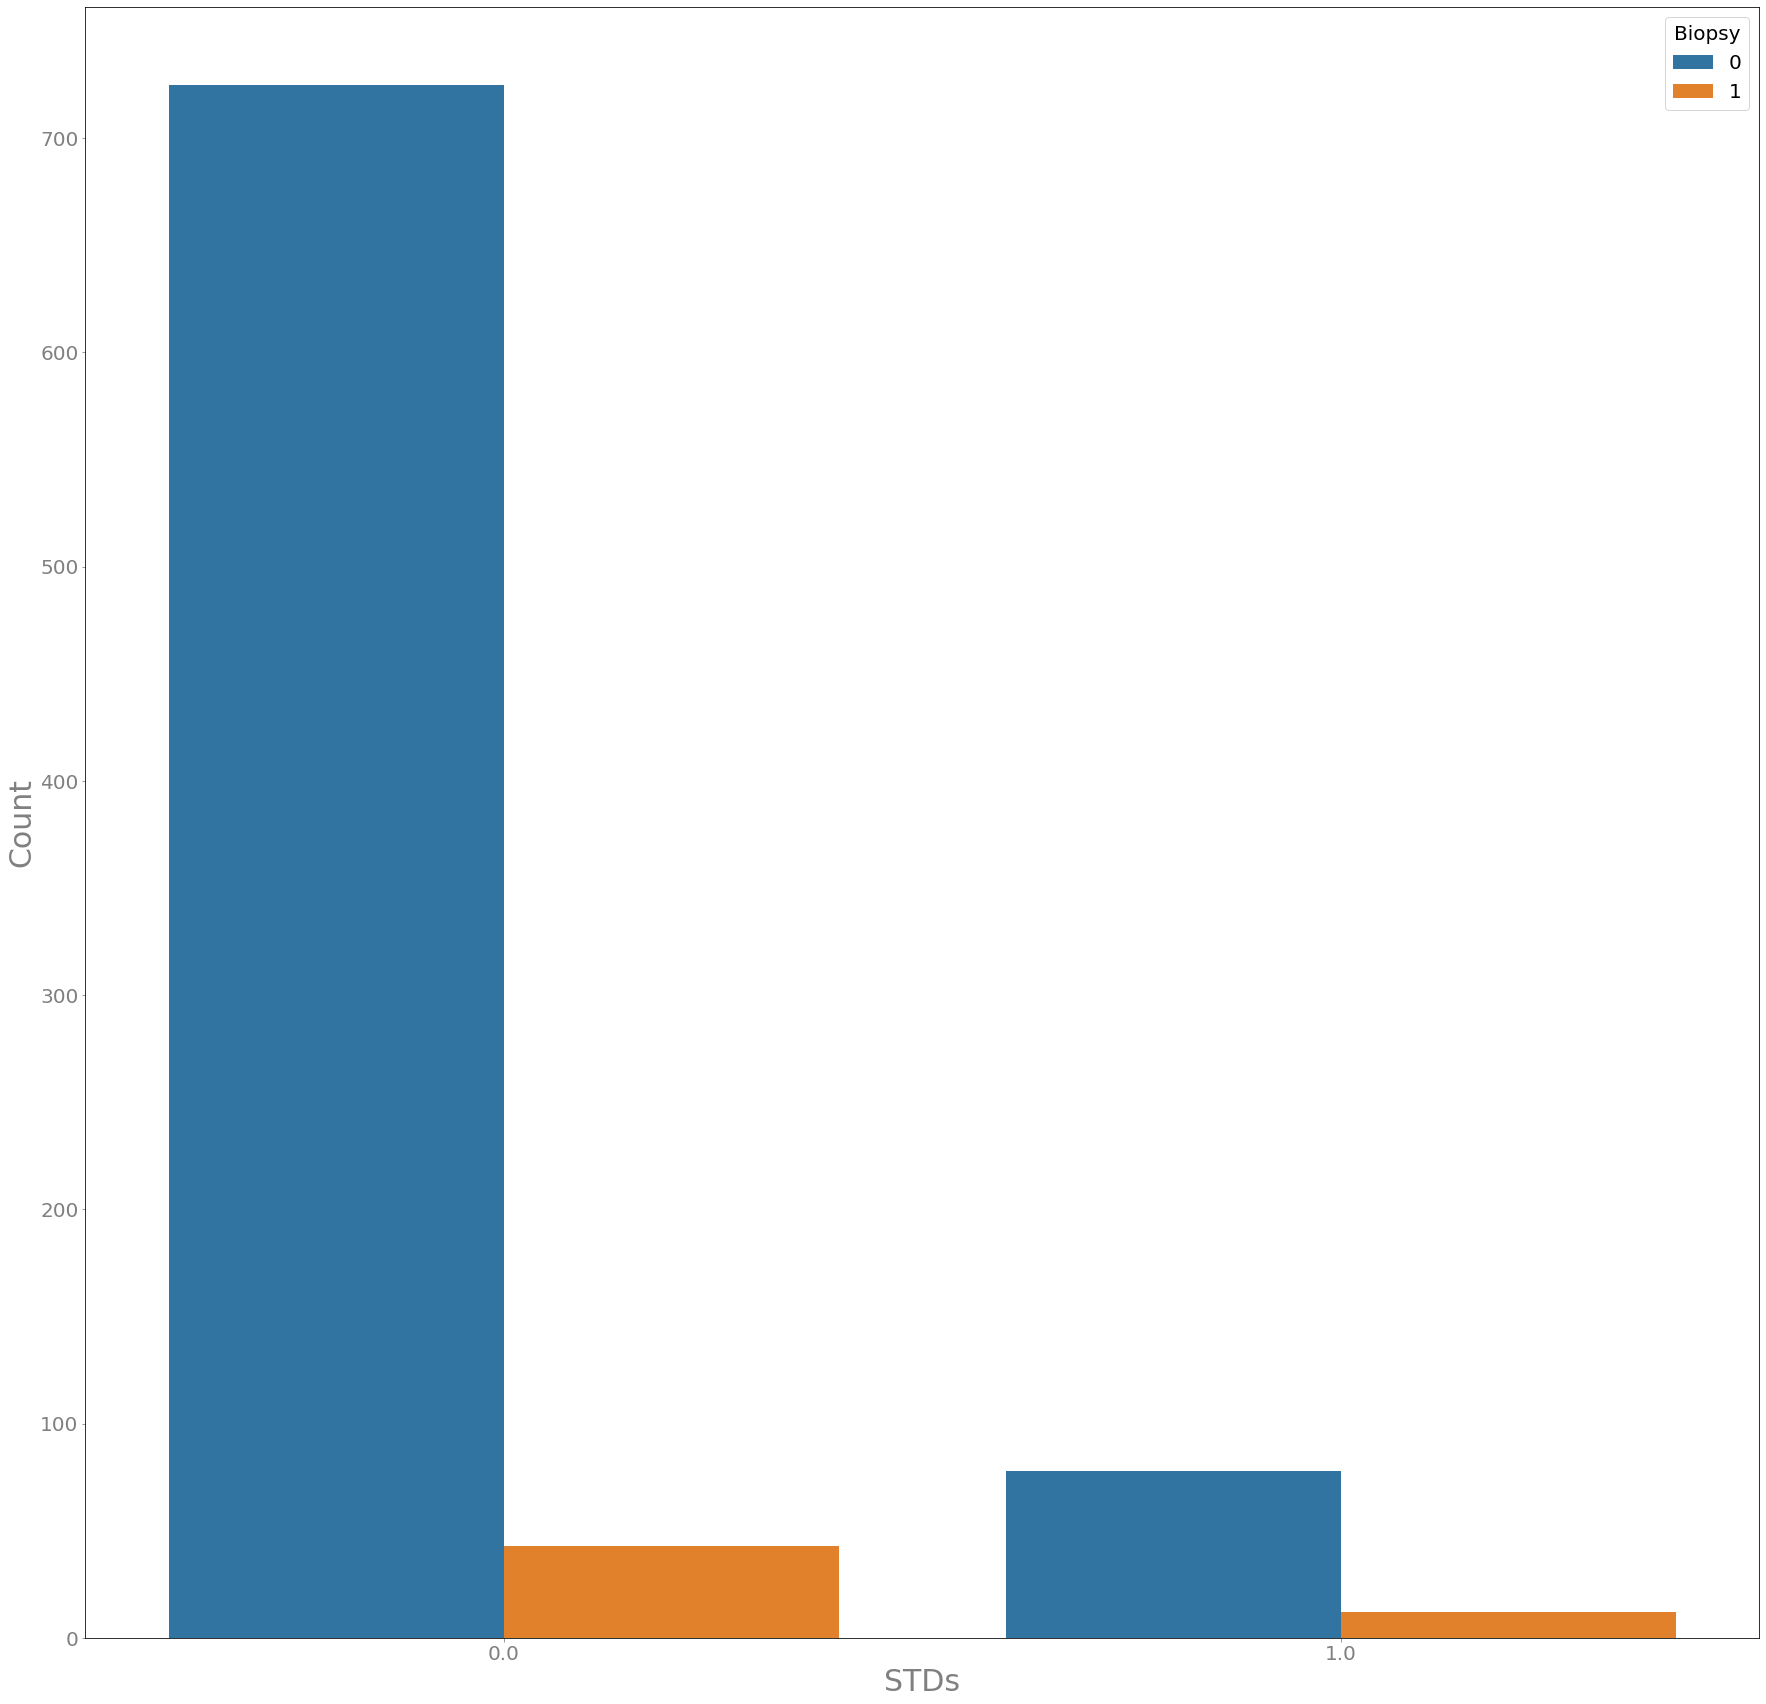

In [176]:
# Countplot of 'STDs' column based on 'Biopsy'
plt.figure(figsize = (30,30))
sns.countplot(data=data4,x='STDs',hue='Biopsy')
plt.xlabel('STDs', fontsize = 30, color = 'gray')
plt.rc('xtick', labelsize=20, color = 'gray')
plt.ylabel('Count', fontsize = 30, color = 'gray')
plt.rc('ytick', labelsize=20, color = 'gray')

In [177]:
# define the feature and target columns.
target = data4 ['Biopsy']
input1=data4.drop (['Biopsy'], axis=1)

In [178]:
X = np.array(input1).astype('float32')
y = np.array(target).astype('float32')

y = y.reshape(-1,1)

In [179]:
#GaussianNB method Modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
classifier = GaussianNB()
classifier.fit(X_train,y_train.ravel())

GaussianNB()

In [180]:
y_predict = classifier.predict(X_test)
print ('Acc:', metrics.accuracy_score(y_test,y_predict))

Acc: 0.872093023255814


In [181]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       159
         1.0       0.09      0.08      0.08        13

    accuracy                           0.87       172
   macro avg       0.51      0.51      0.51       172
weighted avg       0.86      0.87      0.87       172



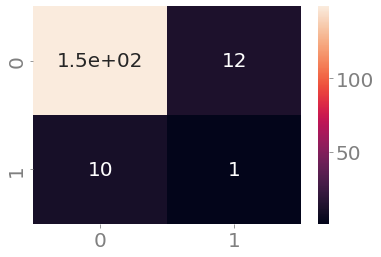

In [182]:
cm1 = confusion_matrix(y_predict, y_test)

sns.heatmap(cm1, annot = True)

plt.show()

In [183]:
# MultinomialNB method
classifier2 = MultinomialNB()
classifier2.fit(X_train,y_train.ravel())

MultinomialNB()

In [184]:
y_predict = classifier2.predict(X_test)
print ('Acc:', metrics.accuracy_score(y_test,y_predict))

Acc: 0.9244186046511628


In [185]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       159
         1.0       0.00      0.00      0.00        13

    accuracy                           0.92       172
   macro avg       0.46      0.50      0.48       172
weighted avg       0.85      0.92      0.89       172



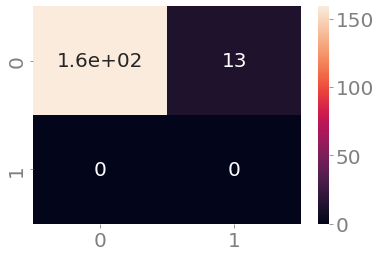

In [186]:
cm2 = confusion_matrix(y_predict, y_test)

sns.heatmap(cm2, annot = True)

plt.show()

In [187]:
#BernoulliNB method
classifier3 = BernoulliNB()
classifier3.fit(X_train,y_train.ravel())

BernoulliNB()

In [188]:
y_predict = classifier3.predict(X_test)
print ('Acc:', metrics.accuracy_score(y_test,y_predict))

Acc: 0.9244186046511628


In [189]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       159
         1.0       0.00      0.00      0.00        13

    accuracy                           0.92       172
   macro avg       0.46      0.50      0.48       172
weighted avg       0.85      0.92      0.89       172



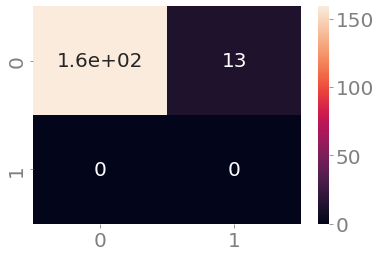

In [190]:
cm3 = confusion_matrix(y_predict, y_test)

sns.heatmap(cm3, annot = True)

plt.show()

In [191]:
#ComplementNB method
classifier4 = ComplementNB()
classifier4.fit(X_train,y_train.ravel())

ComplementNB()

In [192]:
y_predict = classifier4.predict(X_test)
print ('Acc:', metrics.accuracy_score(y_test,y_predict))

Acc: 0.6511627906976745


In [193]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.69      0.78       159
         1.0       0.06      0.23      0.09        13

    accuracy                           0.65       172
   macro avg       0.49      0.46      0.44       172
weighted avg       0.85      0.65      0.73       172



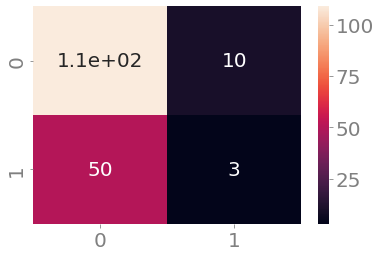

In [194]:
cm4 = confusion_matrix(y_predict, y_test)

sns.heatmap(cm4, annot = True)

plt.show()

In [195]:
#KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
k=15
Acc= np.zeros(k)
for i in range (1, k+1):
    classifier6=KNeighborsClassifier(n_neighbors=i)
    classifier6.fit(X_train, y_train.ravel())
    y_predict = classifier6.predict(X_test)
    Acc [i-1]=metrics.accuracy_score(y_test,y_predict)
Acc

array([0.93023256, 0.9244186 , 0.9244186 , 0.9244186 , 0.9244186 ,
       0.93023256, 0.93023256, 0.93023256, 0.93023256, 0.93023256,
       0.93023256, 0.93023256, 0.93023256, 0.93023256, 0.93023256])

In [196]:
# another way for KNN 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)
k=2
classifier5=KNeighborsClassifier(k)
classifier5.fit(X_train, y_train.ravel())
y_predict = classifier5.predict(X_test)
print ("Acc:", metrics.accuracy_score (y_test, y_predict))

Acc: 0.9244186046511628


In [197]:
#Decision Tree
# entropy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)
classifier7= DecisionTreeClassifier (max_depth=10,criterion = 'entropy')
classifier7 = classifier7.fit(X_train,y_train)
y_pred=classifier7.predict(X_test)
print("Acc:" ,metrics.accuracy_score(y_test,y_pred))

Acc: 0.8837209302325582


In [198]:
#gini
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)
classifier8= DecisionTreeClassifier (max_depth=4)
classifier8 = classifier7.fit(X_train,y_train)
y_pred=classifier8.predict(X_test)
print("Acc:" ,metrics.accuracy_score(y_test,y_pred))

Acc: 0.8837209302325582


In [199]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)
classifier9= RandomForestClassifier (n_estimators = 100,max_depth=15)
classifier9 = classifier9.fit (X_train, y_train)
y_pred = classifier9.predict (X_test)
print ("Acc:" , metrics.accuracy_score(y_test,y_pred))

Acc: 0.936046511627907


In [200]:
#SVM
#RBF
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2 , random_state =2)
classifier10 = SVC(kernel='rbf', random_state = 1)
classifier10.fit(X_train,y_train)
y_pred = classifier10.predict (X_test)
print ("Acc:", metrics.accuracy_score(y_test, y_pred)) 

Acc: 0.9418604651162791


In [201]:
#Linear
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2 , random_state =2)
classifier11 = SVC(kernel='linear', random_state = 1)
classifier11.fit(X_train,y_train)
y_pred = classifier11.predict (X_test)
print ("Acc:", metrics.accuracy_score(y_test, y_pred))

Acc: 0.9418604651162791


In [202]:
#poly
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2 , random_state =2)
classifier12 = SVC(kernel='poly', random_state = 1)
classifier12.fit(X_train,y_train)
y_pred = classifier12.predict (X_test)
print ("Acc:", metrics.accuracy_score(y_test, y_pred))

Acc: 0.9418604651162791


In [203]:
#sigmoid
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3 , random_state =2)
classifier13 = SVC(kernel='sigmoid', random_state = 1)
classifier13.fit(X_train,y_train)
y_pred = classifier13.predict (X_test)
print ("Acc:", metrics.accuracy_score(y_test, y_pred))

Acc: 0.937984496124031
